In [1]:
install.packages('tsibble')
install.packages('lmtest')
library(dplyr)
library(lubridate)
library(ggplot2)
library(xts)
library(tidyverse)
library(tsibble)
library(lmtest)


also installing the dependencies ‘BH’, ‘anytime’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Etc/UCT’ (or equivalent)”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘xts’


The following objects are masked from ‘package:dplyr’:

    first, last


── Attaching packages ─

In [2]:
df <- readRDS('../Data/Full_data.rds')

In [3]:
ts <- as_tsibble(df, index = chunk)
ts$texts <- as.numeric(ts$texts)

In [4]:
ts$polarity <- as.numeric(ts$polarity)
ts$daily_policy_index  <- as.numeric(ts$daily_policy_index)

In [5]:
str(ts)

tbl_ts [31,658 × 65] (S3: tbl_ts/tbl_df/tbl/data.frame)
 $ chunk               : POSIXct[1:31658], format: "2018-10-26 19:00:00" "2018-10-26 20:00:00" ...
 $ texts               : num [1:31658] 17 15 15 19 21 5 8 3 0 0 ...
 $ temp_weighted       : num [1:31658] 6.03 5.56 5.4 4.79 4.53 ...
 $ cloud_cover_weighted: num [1:31658] 21.5 16.3 17.5 10.8 11.7 ...
 $ rainfall_weighted   : num [1:31658] 0 0 0 0 0 0 0 0 0 0 ...
 $ polarity            : num [1:31658] 0.0432 0.0432 0.0432 0.0432 0.0432 ...
 $ standardised_texts  : num [1:31658] 0.417 -0.405 -0.915 -0.338 1.042 ...
 $ abnormal            : int [1:31658] 0 0 0 0 0 0 0 0 0 0 ...
 $ daily_policy_index  : num [1:31658] 131 131 131 131 131 ...
 $ 1_hr_std            : num [1:31658] -0.601 0.417 -0.405 -0.915 -0.338 ...
 $ 2_hr_std            : num [1:31658] -1.373 -0.601 0.417 -0.405 -0.915 ...
 $ 3_hr_std            : num [1:31658] -0.0248 -1.3726 -0.6011 0.4171 -0.4045 ...
 $ 4_hr_std            : num [1:31658] -0.4375 -0.0248 -1.3726 

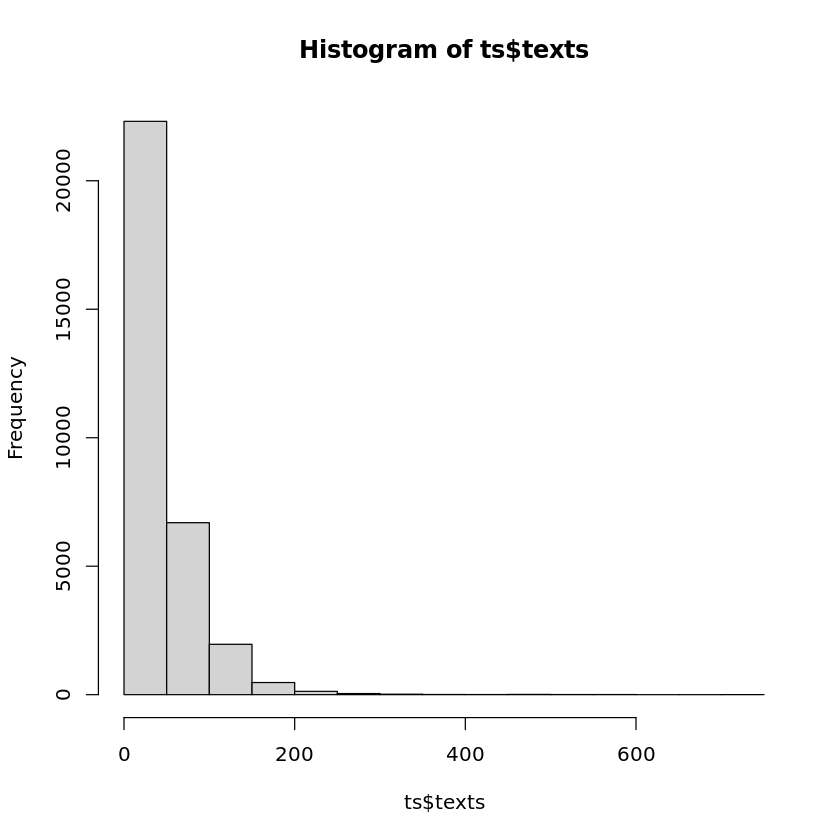

In [6]:
hist(ts$texts)

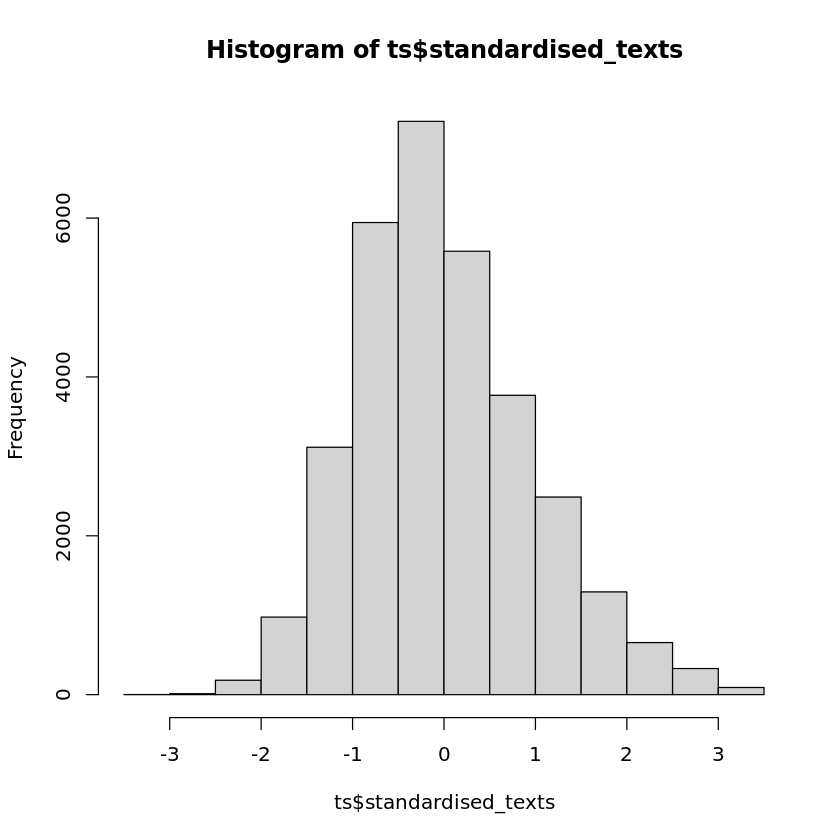

In [7]:
hist(ts$standardised_texts)

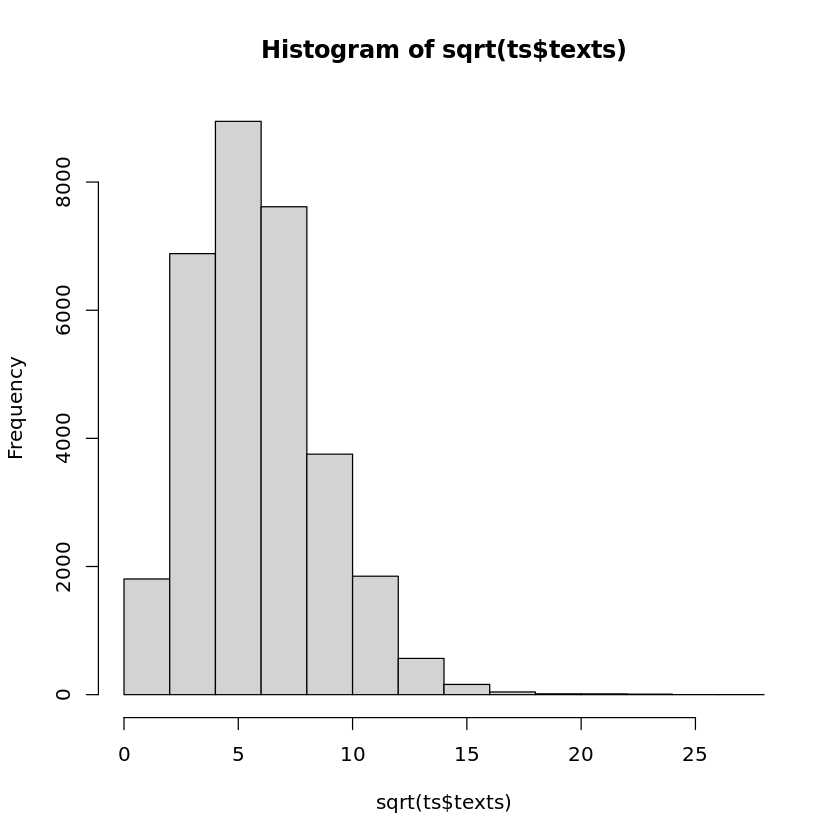

In [8]:
hist(sqrt(ts$texts))

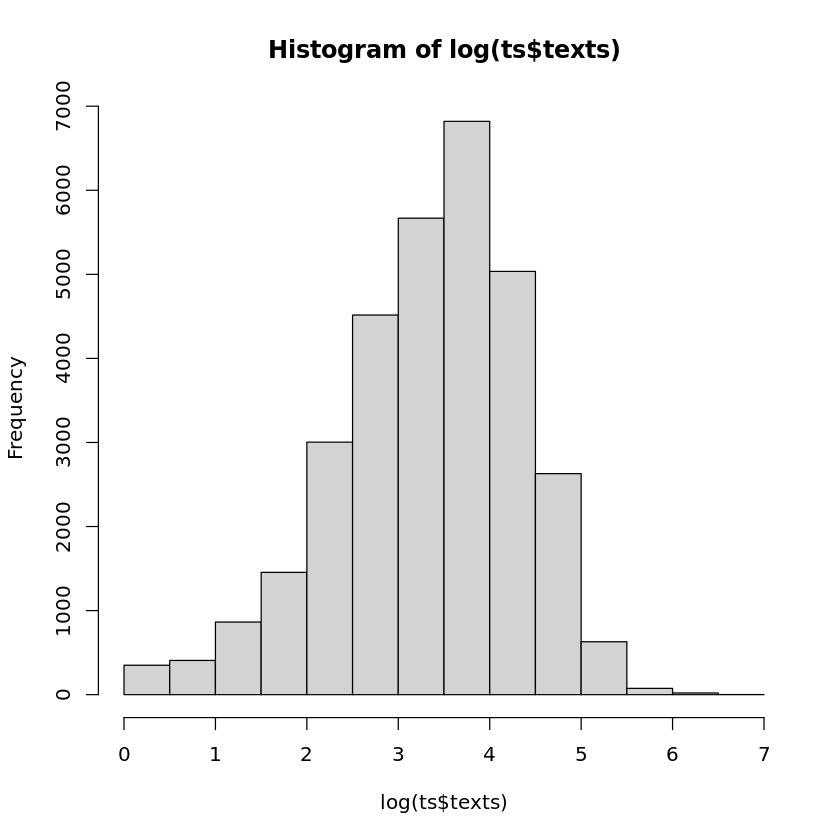

In [9]:
hist(log(ts$texts))

### Temp vs Sqrt Texts

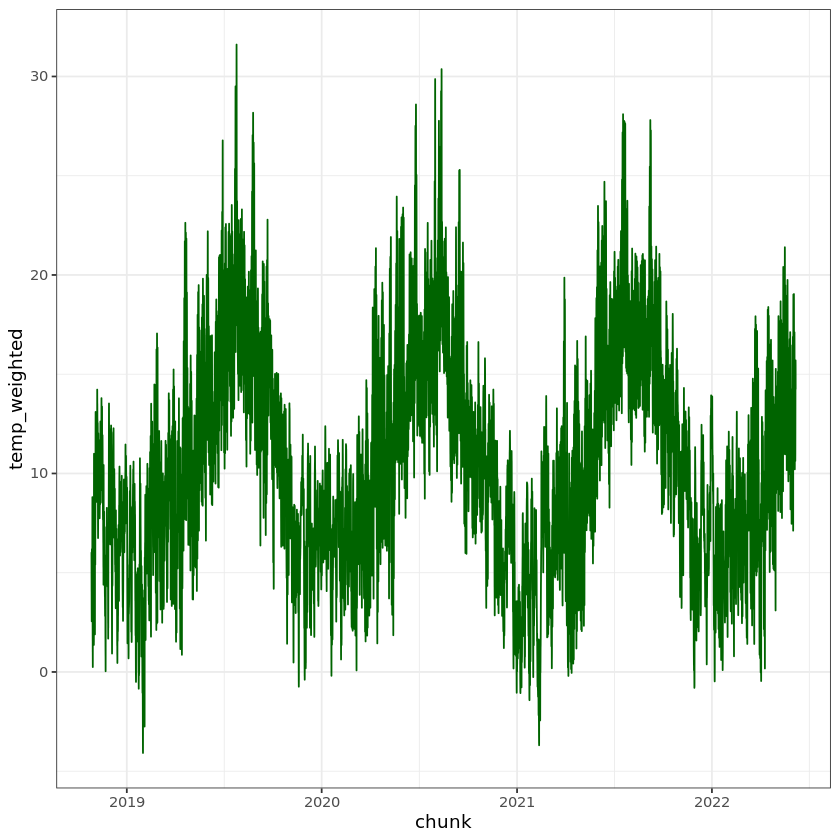

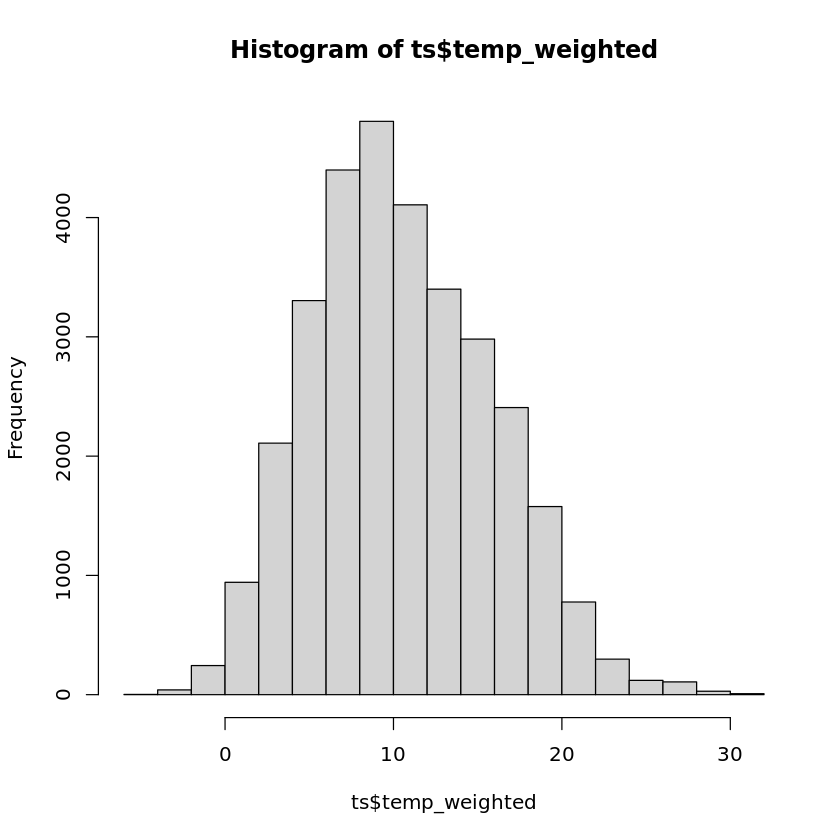

avg.temp,mean_texts
<ord>,<dbl>
0 & below,37.71678
0-5,42.45971
5-10,43.89929
10-15,43.80898
15-20,41.05008
20-25,34.67308


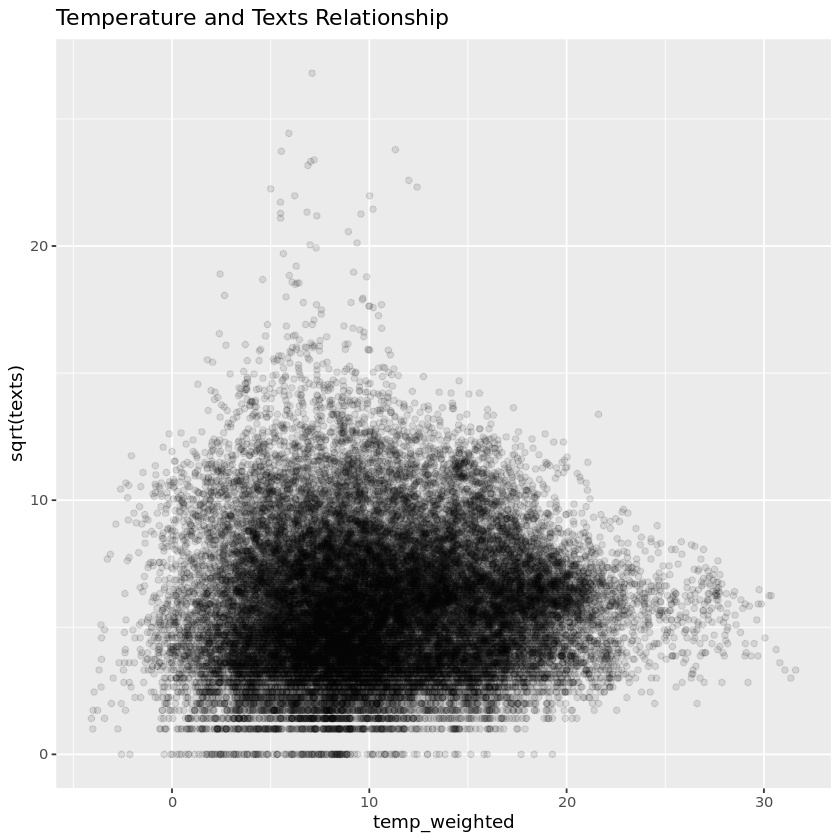


	Pearson's product-moment correlation

data:  ts$temp_weighted and sqrt(ts$texts)
t = 2.7776, df = 31656, p-value = 0.005479
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.004594699 0.026620593
sample estimates:
       cor 
0.01560954 



Call:
lm(formula = sqrt(texts) ~ temp_weighted, data = ts)

Residuals:
   Min     1Q Median     3Q    Max 
-5.993 -2.028 -0.281  1.601 20.901 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.836370   0.034410 169.610  < 2e-16 ***
temp_weighted 0.008118   0.002923   2.778  0.00548 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.765 on 31656 degrees of freedom
Multiple R-squared:  0.0002437,	Adjusted R-squared:  0.0002121 
F-statistic: 7.715 on 1 and 31656 DF,  p-value: 0.005479


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31654,NA,NA,NA
2,31655,-1,398.3001,4.501181e-88


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31651,NA,NA,NA
2,31653,-2,161.7444,1.293688e-70


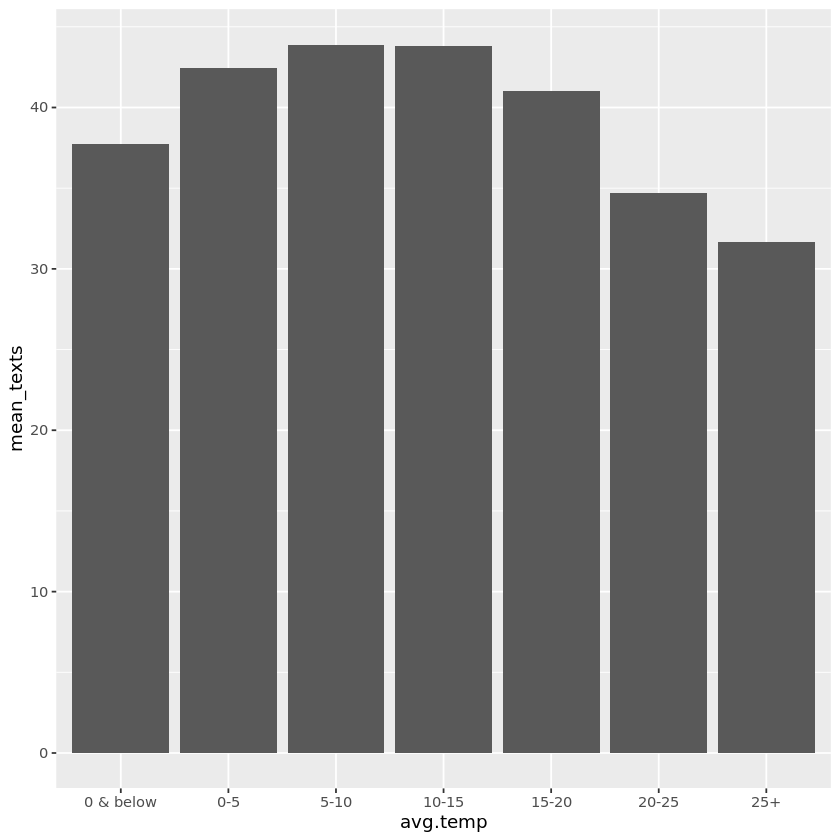

In [10]:
ggplot(ts,aes(chunk,temp_weighted)) + geom_line(col="darkgreen") + theme_bw()
hist(ts$temp_weighted)
ggplot(ts,aes(temp_weighted,sqrt(texts))) + geom_point(alpha=0.1) + ggtitle("Temperature and Texts Relationship")
ts$avg.temp <- ifelse(ts$temp_weighted<0,"0 & below",
                      ifelse(ts$temp_weighted<5,"0-5",
                             ifelse(ts$temp_weighted<10,"5-10",
                                    ifelse(ts$temp_weighted<15,"10-15",
                                           ifelse(ts$temp_weighted<20,"15-20",
                                                  ifelse(ts$temp_weighted<25,"20-25","25+"))))))
ts$avg.temp <- factor(ts$avg.temp, levels=c("0 & below","0-5","5-10","10-15","15-20","20-25","25+"), ordered=TRUE)
temperatures<- ts %>% as.data.frame() %>% group_by(avg.temp) %>% summarise(mean_texts = mean(texts))
head(temperatures)
ggplot(temperatures,aes(avg.temp,mean_texts)) + geom_col()
cor.test(ts$temp_weighted,sqrt(ts$texts))
summary(lm(data=ts,sqrt(texts) ~ temp_weighted))
grangertest(sqrt(texts) ~ temp_weighted, order = 1, data = ts)
grangertest(sqrt(texts) ~ temp_weighted, order = 2, data = ts)

### Temp vs Std Texts

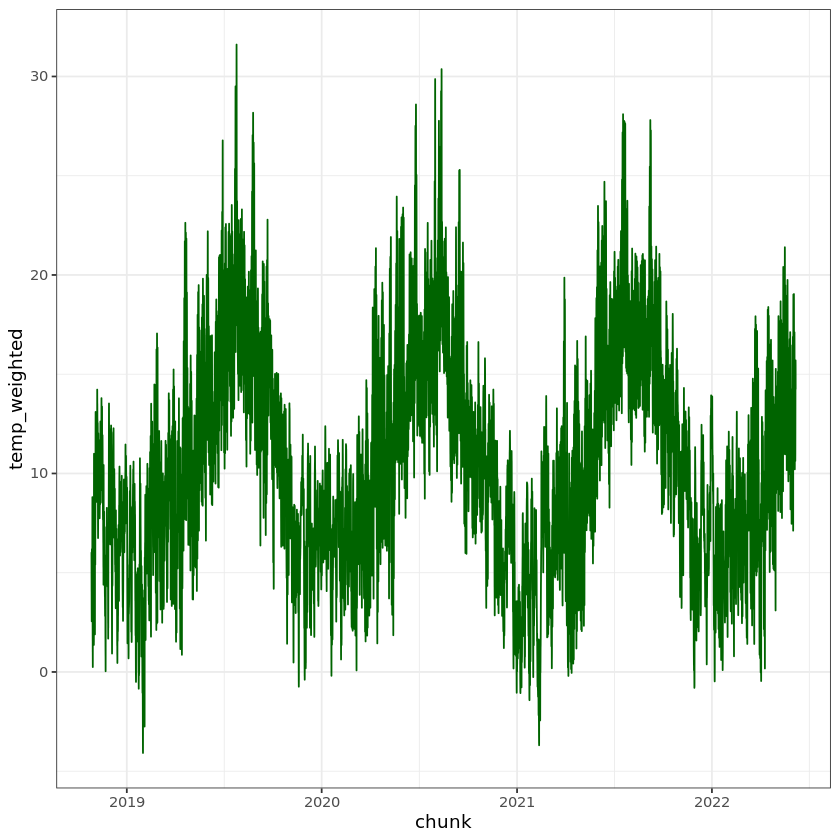

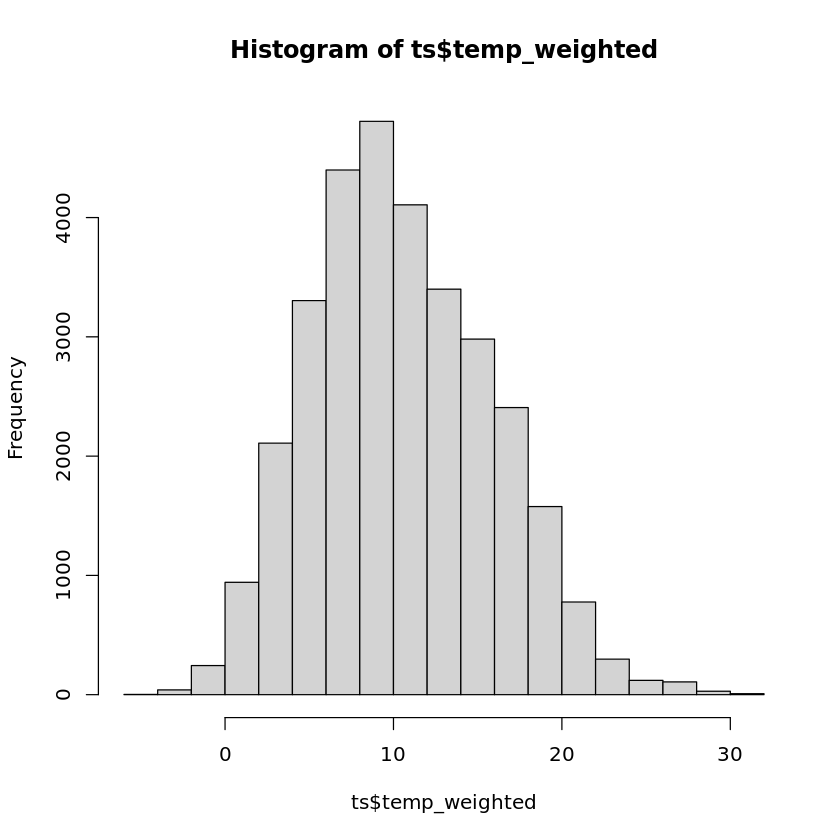

avg.temp,mean_texts
<ord>,<dbl>
0 & below,0.020778291
0-5,-0.063048252
5-10,-0.001516254
10-15,0.053770631
15-20,0.016726089
20-25,-0.167775114


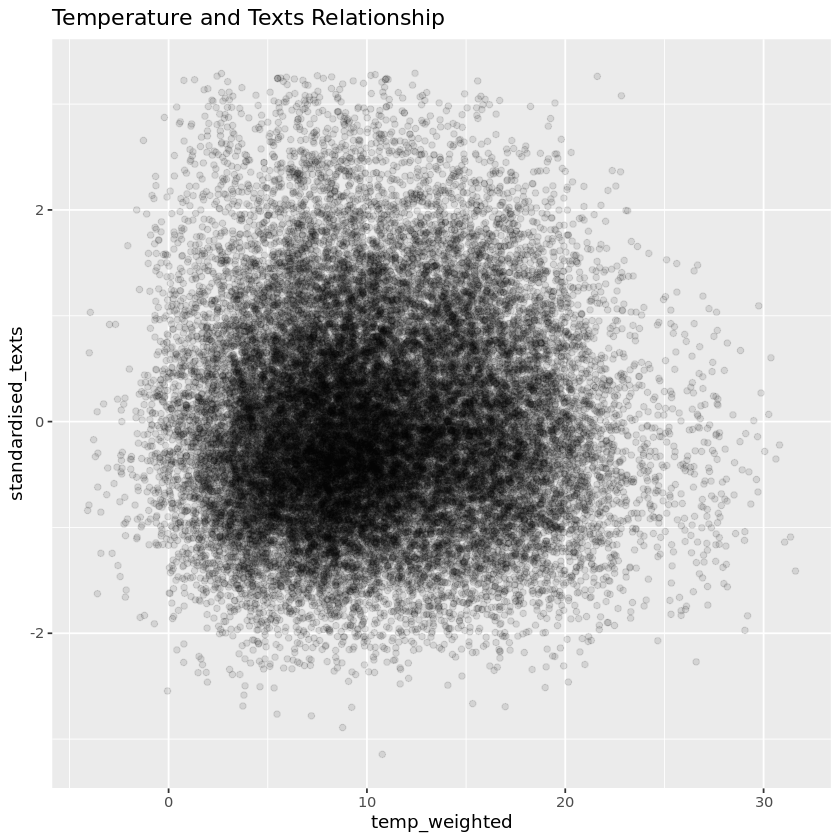


	Pearson's product-moment correlation

data:  ts$temp_weighted and ts$standardised_texts
t = -0.24689, df = 31656, p-value = 0.805
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.012403102  0.009628117
sample estimates:
         cor 
-0.001387661 



Call:
lm(formula = standardised_texts ~ temp_weighted, data = ts)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1445 -0.6667 -0.1154  0.5848  3.2910 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)
(Intercept)    0.0029390  0.0119410   0.246    0.806
temp_weighted -0.0002504  0.0010142  -0.247    0.805

Residual standard error: 0.9594 on 31656 degrees of freedom
Multiple R-squared:  1.926e-06,	Adjusted R-squared:  -2.966e-05 
F-statistic: 0.06096 on 1 and 31656 DF,  p-value: 0.805


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31654,NA,NA,NA
2,31655,-1,0.06806159,0.794182


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31651,NA,NA,NA
2,31653,-2,0.04848989,0.952667


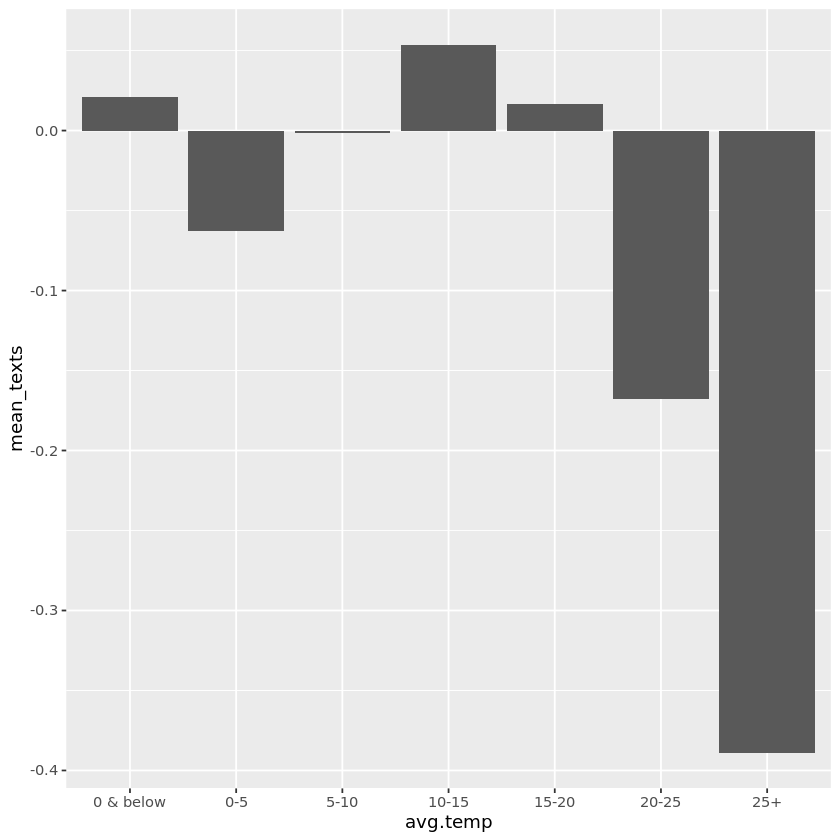

In [11]:
ggplot(ts,aes(chunk,temp_weighted)) + geom_line(col="darkgreen") + theme_bw()
hist(ts$temp_weighted)
ggplot(ts,aes(temp_weighted,standardised_texts)) + geom_point(alpha=0.1) + ggtitle("Temperature and Texts Relationship")
ts$avg.temp <- ifelse(ts$temp_weighted<0,"0 & below",
                      ifelse(ts$temp_weighted<5,"0-5",
                             ifelse(ts$temp_weighted<10,"5-10",
                                    ifelse(ts$temp_weighted<15,"10-15",
                                           ifelse(ts$temp_weighted<20,"15-20",
                                                  ifelse(ts$temp_weighted<25,"20-25","25+"))))))
ts$avg.temp <- factor(ts$avg.temp, levels=c("0 & below","0-5","5-10","10-15","15-20","20-25","25+"), ordered=TRUE)
temperatures<- ts %>% as.data.frame() %>% group_by(avg.temp) %>% summarise(mean_texts = mean(standardised_texts))
head(temperatures)
ggplot(temperatures,aes(avg.temp,mean_texts)) + geom_col()
cor.test(ts$temp_weighted,ts$standardised_texts)
summary(lm(data=ts,standardised_texts ~ temp_weighted))
grangertest(standardised_texts ~ temp_weighted, order = 1, data = ts)
grangertest(standardised_texts ~ temp_weighted, order = 2, data = ts)

### Polarity vs sqrt Texts

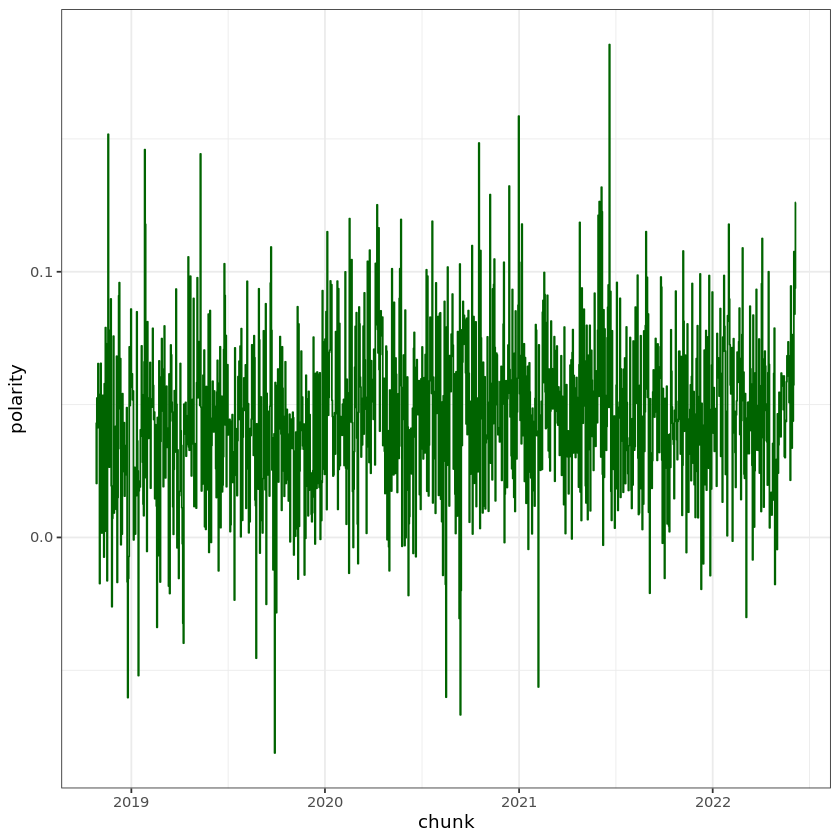

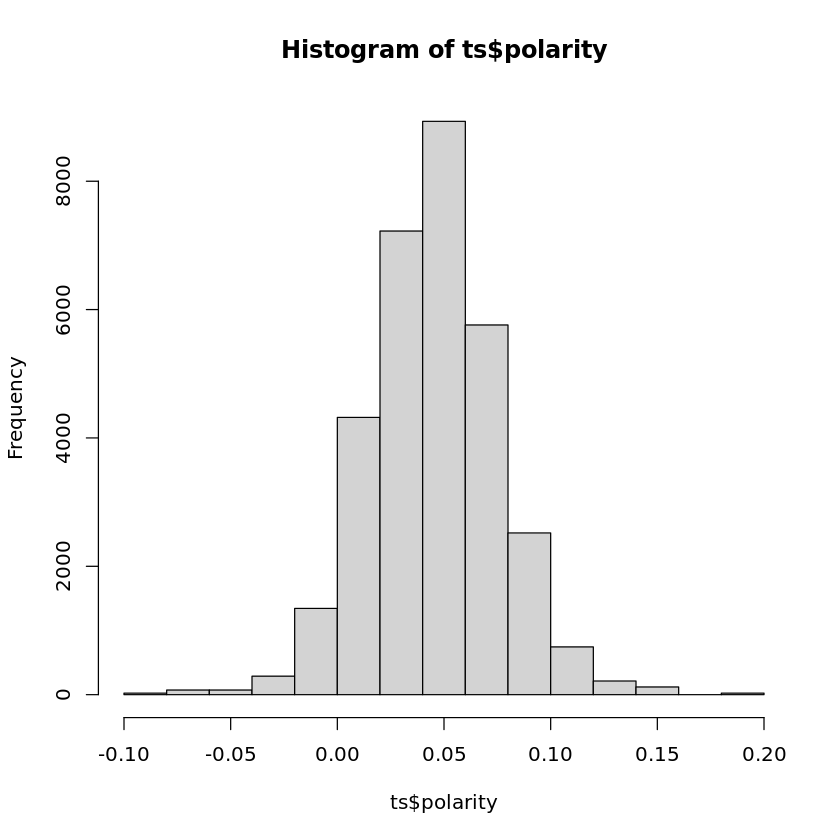


	Pearson's product-moment correlation

data:  ts$polarity and sqrt(ts$texts)
t = 14.997, df = 31656, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.07304526 0.09492112
sample estimates:
       cor 
0.08399331 



Call:
lm(formula = sqrt(texts) ~ polarity, data = ts)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7337 -2.0203 -0.2788  1.5901 20.8581 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.57529    0.02781   200.5   <2e-16 ***
polarity     7.63371    0.50901    15.0   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.755 on 31656 degrees of freedom
Multiple R-squared:  0.007055,	Adjusted R-squared:  0.007024 
F-statistic: 224.9 on 1 and 31656 DF,  p-value: < 2.2e-16


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31654,NA,NA,NA
2,31655,-1,10.64301,0.001106049


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31651,NA,NA,NA
2,31653,-2,6.703254,0.001228656


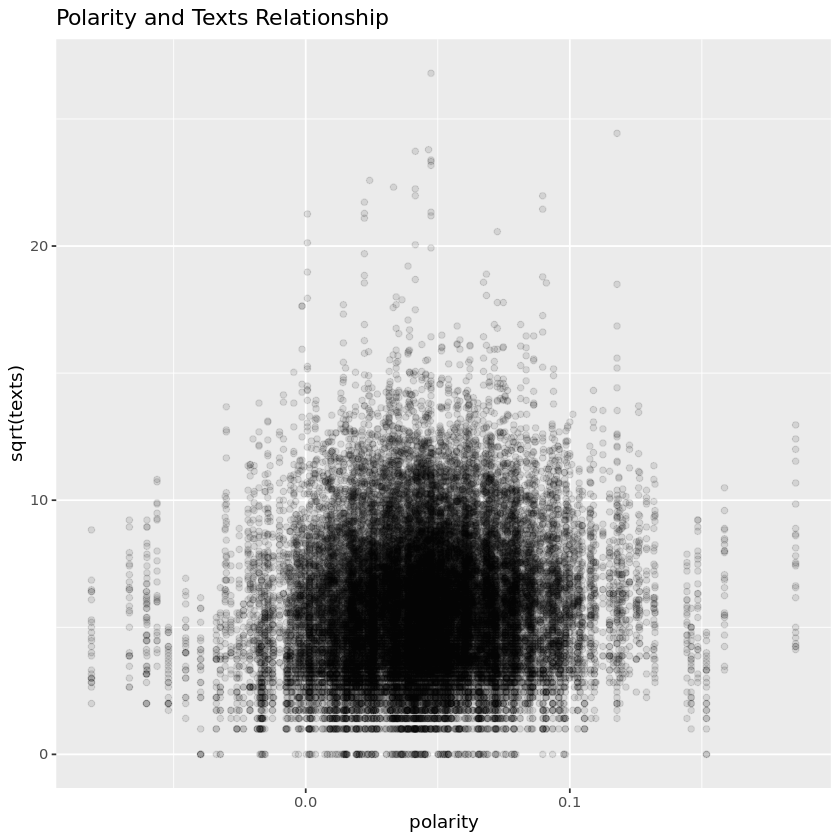

In [12]:
ggplot(ts,aes(chunk,polarity)) + geom_line(col="darkgreen") + theme_bw()
hist(ts$polarity)
ggplot(ts,aes(polarity,sqrt(texts))) + geom_point(alpha=0.1) + ggtitle("Polarity and Texts Relationship")

cor.test(ts$polarity,sqrt(ts$texts))
summary(lm(data=ts,sqrt(texts) ~ polarity))
grangertest(sqrt(texts) ~ polarity, order = 1, data = ts)
grangertest(sqrt(texts) ~ polarity, order = 2, data = ts)

### Polarity vs Std Texts

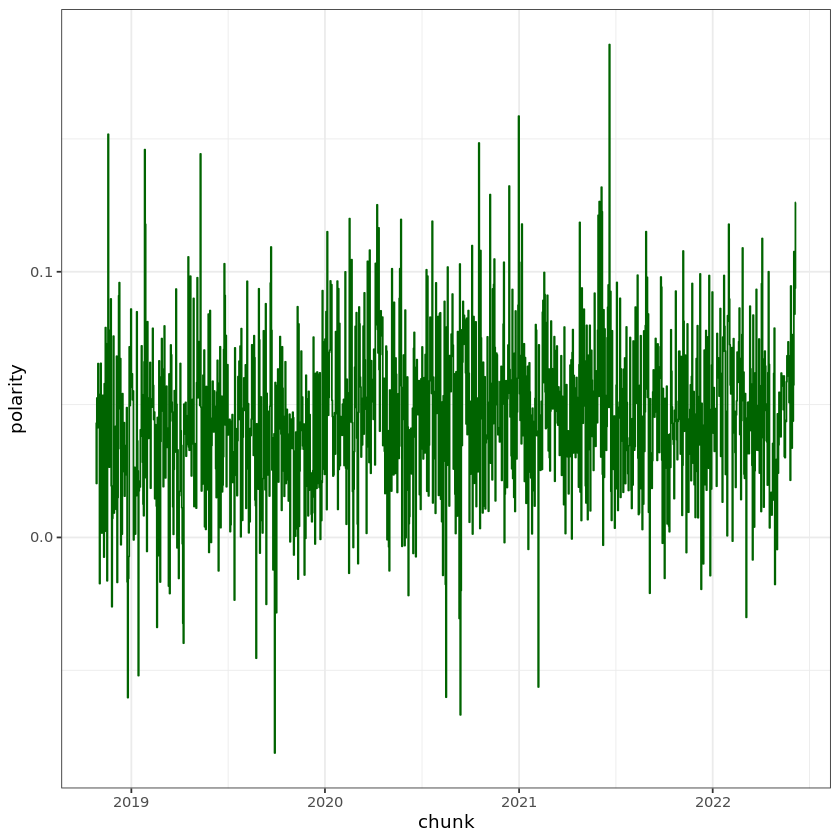

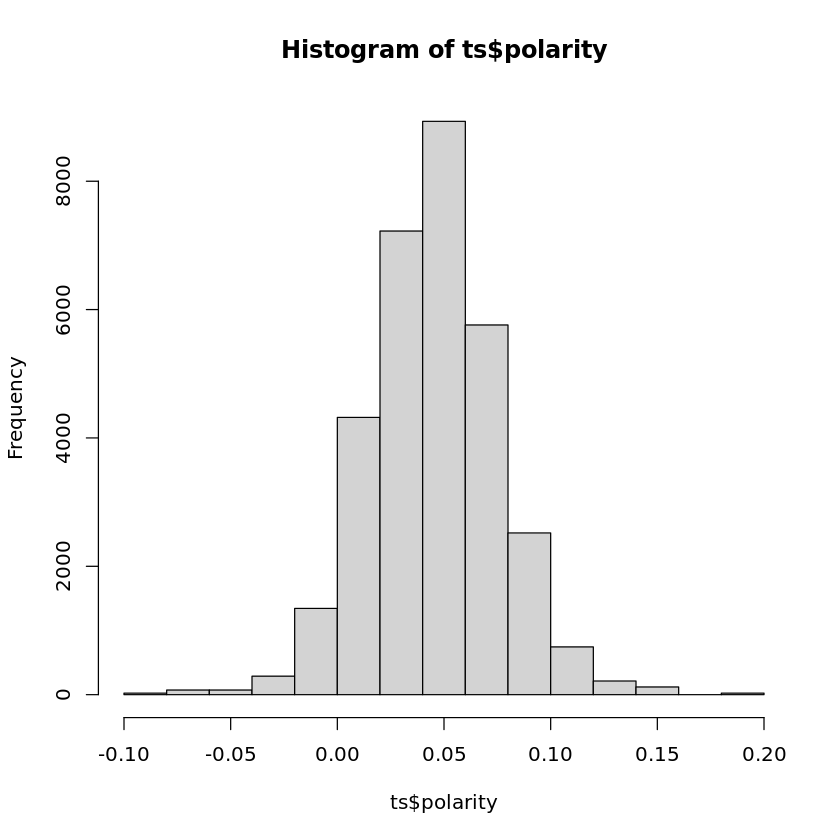


	Pearson's product-moment correlation

data:  ts$polarity and ts$standardised_texts
t = -2.1129, df = 31656, p-value = 0.03461
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.0228874683 -0.0008593133
sample estimates:
        cor 
-0.01187483 



Call:
lm(formula = standardised_texts ~ polarity, data = ts)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1378 -0.6672 -0.1157  0.5846  3.2972 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.017299   0.009682   1.787   0.0740 .
polarity    -0.374468   0.177227  -2.113   0.0346 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9594 on 31656 degrees of freedom
Multiple R-squared:  0.000141,	Adjusted R-squared:  0.0001094 
F-statistic: 4.464 on 1 and 31656 DF,  p-value: 0.03461


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31654,NA,NA,NA
2,31655,-1,1.178112,0.277749


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31651,NA,NA,NA
2,31653,-2,0.6298397,0.5326839


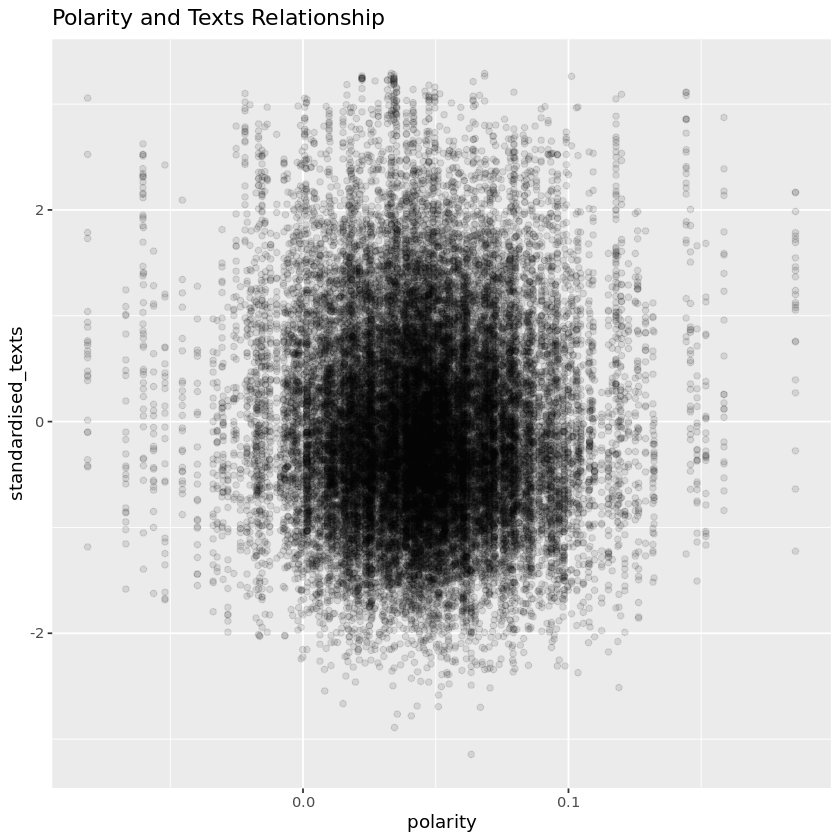

In [13]:
ggplot(ts,aes(chunk,polarity)) + geom_line(col="darkgreen") + theme_bw()
hist(ts$polarity)
ggplot(ts,aes(polarity,standardised_texts)) + geom_point(alpha=0.1) + ggtitle("Polarity and Texts Relationship")

cor.test(ts$polarity,ts$standardised_texts)
summary(lm(data=ts,standardised_texts ~ polarity))
grangertest(standardised_texts ~ polarity, order = 1, data = ts)
grangertest(standardised_texts ~ polarity, order = 2, data = ts)

### Sqrt Texts vs Avg 24-hr temp

In [14]:
ts$temp_avg <- rep(NA, (dim(ts)[1])) %>% as.numeric
for (i in seq(25,(dim(ts)[1]),by=1)) {
  ts[i,'temp_avg'] <- (ts[(i-24):(i-1),'temp_weighted']  %>% summarise_if(is.numeric, mean))[[1]]
}
summary(ts$temp_avg)
cor.test(ts$temp_avg,sqrt(ts$texts))
summary(lm(data=ts,sqrt(texts) ~ temp_avg))
grangertest(sqrt(texts) ~ temp_avg, order = 1, data = ts)
grangertest(sqrt(texts) ~ temp_avg, order = 2, data = ts)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -1.642   6.831   9.944  10.506  14.495  25.159      24 


	Pearson's product-moment correlation

data:  ts$temp_avg and sqrt(ts$texts)
t = -4.7481, df = 31632, p-value = 2.062e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.03769603 -0.01567210
sample estimates:
       cor 
-0.0266873 



Call:
lm(formula = sqrt(texts) ~ temp_avg, data = ts)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0750 -2.0193 -0.2609  1.6072 20.7929 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.085259   0.037286 163.206  < 2e-16 ***
temp_avg    -0.015319   0.003226  -4.748 2.06e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.763 on 31632 degrees of freedom
  (24 observations deleted due to missingness)
Multiple R-squared:  0.0007122,	Adjusted R-squared:  0.0006806 
F-statistic: 22.54 on 1 and 31632 DF,  p-value: 2.062e-06


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31630,NA,NA,NA
2,31631,-1,0.8074139,0.3688928


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31627,NA,NA,NA
2,31629,-2,0.5046213,0.603739


### Std Texts vs avg 24-hr Temp

In [15]:
ts$temp_avg <- rep(NA, (dim(ts)[1])) %>% as.numeric
for (i in seq(25,(dim(ts)[1]),by=1)) {
  ts[i,'temp_avg'] <- (ts[(i-24):(i-1),'temp_weighted']  %>% summarise_if(is.numeric, mean))[[1]]
}
summary(ts$temp_avg)
cor.test(ts$temp_avg,ts$standardised_texts)
summary(lm(data=ts,standardised_texts ~ temp_avg))
grangertest(standardised_texts ~ temp_avg, order = 1, data = ts)
grangertest(standardised_texts ~ temp_avg, order = 2, data = ts)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -1.642   6.831   9.944  10.506  14.495  25.159      24 


	Pearson's product-moment correlation

data:  ts$temp_avg and ts$standardised_texts
t = -0.09133, df = 31632, p-value = 0.9272
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.01153325  0.01050636
sample estimates:
          cor 
-0.0005135108 



Call:
lm(formula = standardised_texts ~ temp_avg, data = ts)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1452 -0.6661 -0.1153  0.5849  3.2908 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.0015800  0.0129467   0.122    0.903
temp_avg    -0.0001023  0.0011203  -0.091    0.927

Residual standard error: 0.9595 on 31632 degrees of freedom
  (24 observations deleted due to missingness)
Multiple R-squared:  2.637e-07,	Adjusted R-squared:  -3.135e-05 
F-statistic: 0.008341 on 1 and 31632 DF,  p-value: 0.9272


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31630,NA,NA,NA
2,31631,-1,0.002085238,0.963578


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31627,NA,NA,NA
2,31629,-2,0.01759166,0.9825622


In [16]:
ts$temp_avg <- rep(NA, (dim(ts)[1])) %>% as.numeric
for (i in seq(25,(dim(ts)[1]),by=1)) {
  ts[i,'temp_avg'] <- (ts[(i-24):(i-1),'polarity']  %>% summarise_if(is.numeric, mean))[[1]]
}
summary(ts$temp_avg)
cor.test(ts$temp_avg,sqrt(ts$texts))
summary(lm(data=ts,sqrt(texts) ~ temp_avg))
grangertest(sqrt(texts) ~ temp_avg, order = 1, data = ts)
grangertest(sqrt(texts) ~ temp_avg, order = 2, data = ts)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
-0.08113  0.02919  0.04502  0.04535  0.06084  0.18552       24 


	Pearson's product-moment correlation

data:  ts$temp_avg and sqrt(ts$texts)
t = 18.556, df = 31632, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.0928581 0.1146604
sample estimates:
      cor 
0.1037717 



Call:
lm(formula = sqrt(texts) ~ temp_avg, data = ts)

Residuals:
   Min     1Q Median     3Q    Max 
-7.010 -2.009 -0.273  1.591 20.881 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.41798    0.03136  172.76   <2e-16 ***
temp_avg    11.16618    0.60174   18.56   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.749 on 31632 degrees of freedom
  (24 observations deleted due to missingness)
Multiple R-squared:  0.01077,	Adjusted R-squared:  0.01074 
F-statistic: 344.3 on 1 and 31632 DF,  p-value: < 2.2e-16


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31630,NA,NA,NA
2,31631,-1,15.3829,8.796424e-05


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31627,NA,NA,NA
2,31629,-2,9.459449,7.817033e-05


In [17]:
ts$temp_avg <- rep(NA, (dim(ts)[1])) %>% as.numeric
for (i in seq(25,(dim(ts)[1]),by=1)) {
  ts[i,'temp_avg'] <- (ts[(i-24):(i-1),'polarity']  %>% summarise_if(is.numeric, mean))[[1]]
}
summary(ts$temp_avg)
cor.test(ts$temp_avg,ts$standardised_texts)
summary(lm(data=ts,standardised_texts ~ temp_avg))
grangertest(standardised_texts ~ temp_avg, order = 1, data = ts)
grangertest(standardised_texts ~ temp_avg, order = 2, data = ts)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
-0.08113  0.02919  0.04502  0.04535  0.06084  0.18552       24 


	Pearson's product-moment correlation

data:  ts$temp_avg and ts$standardised_texts
t = -1.6974, df = 31632, p-value = 0.08962
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.020561255  0.001476355
sample estimates:
         cor 
-0.009543608 



Call:
lm(formula = standardised_texts ~ temp_avg, data = ts)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1429 -0.6661 -0.1158  0.5852  3.2992 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.01667    0.01094   1.523   0.1278  
temp_avg    -0.35645    0.20999  -1.697   0.0896 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9594 on 31632 degrees of freedom
  (24 observations deleted due to missingness)
Multiple R-squared:  9.108e-05,	Adjusted R-squared:  5.947e-05 
F-statistic: 2.881 on 1 and 31632 DF,  p-value: 0.08962


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31630,NA,NA,NA
2,31631,-1,0.9458485,0.3307857


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31627,NA,NA,NA
2,31629,-2,0.5212124,0.5938053


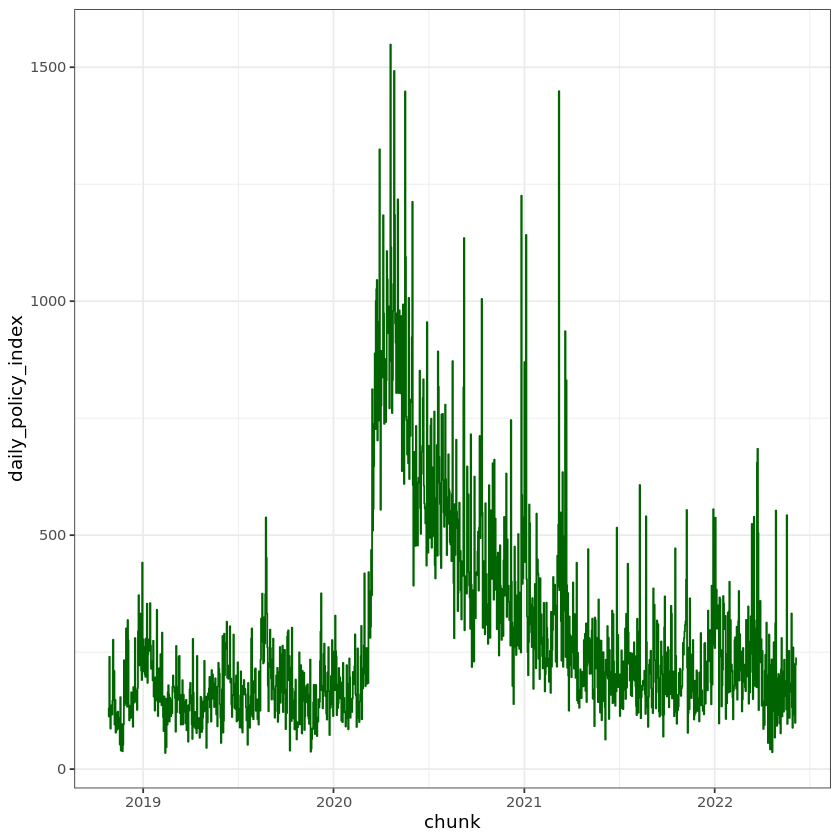

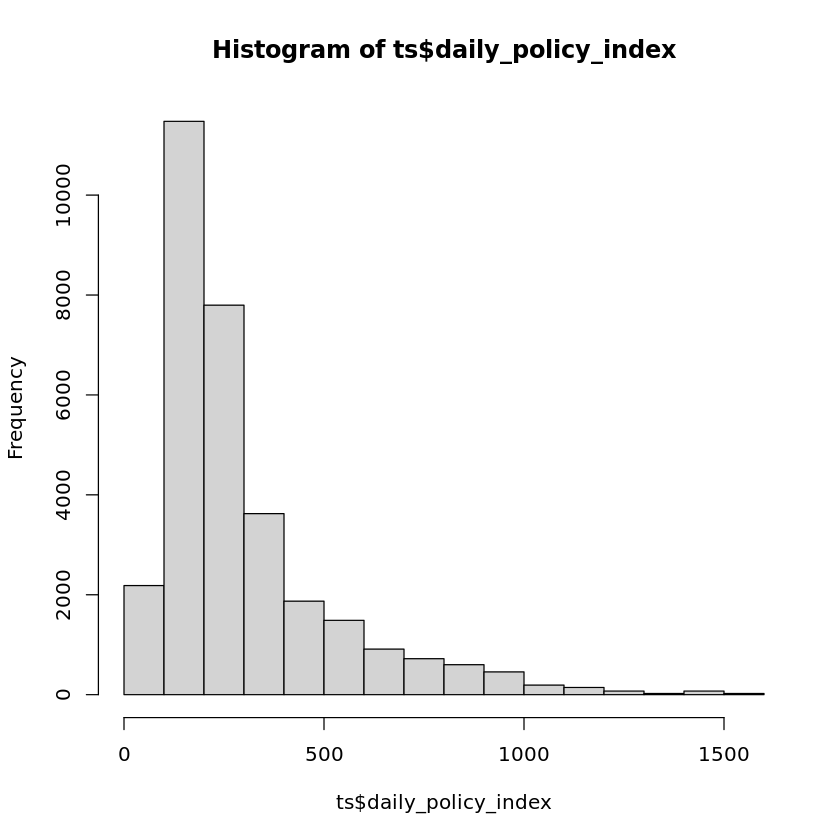


	Pearson's product-moment correlation

data:  ts$daily_policy_index and sqrt(ts$texts)
t = 18.149, df = 31656, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.09056372 0.11236813
sample estimates:
      cor 
0.1014781 



Call:
lm(formula = sqrt(texts) ~ daily_policy_index, data = ts)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.2030 -1.9954 -0.3058  1.5681 20.8260 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        5.553e+00  2.555e-02  217.33   <2e-16 ***
daily_policy_index 1.246e-03  6.866e-05   18.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.751 on 31656 degrees of freedom
Multiple R-squared:  0.0103,	Adjusted R-squared:  0.01027 
F-statistic: 329.4 on 1 and 31656 DF,  p-value: < 2.2e-16


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31654,NA,NA,NA
2,31655,-1,12.70954,0.0003643315


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31651,NA,NA,NA
2,31653,-2,7.911696,0.0003671579


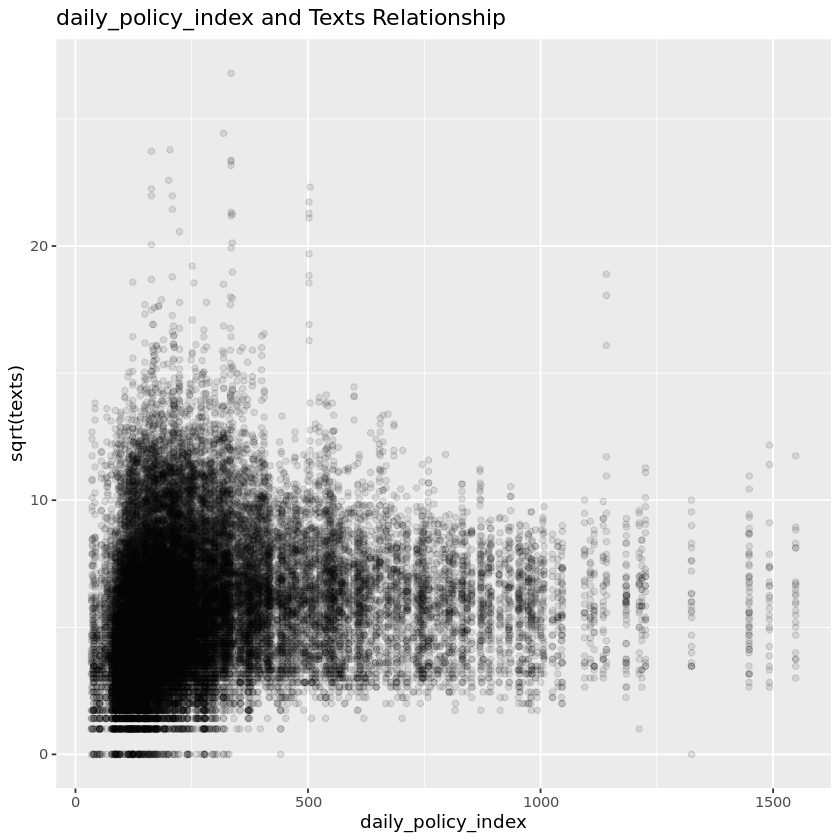

In [18]:
ggplot(ts,aes(chunk,daily_policy_index)) + geom_line(col="darkgreen") + theme_bw()
hist(ts$daily_policy_index)
ggplot(ts,aes(daily_policy_index,sqrt(texts))) + geom_point(alpha=0.1) + ggtitle("daily_policy_index and Texts Relationship")

cor.test(ts$daily_policy_index,sqrt(ts$texts))
summary(lm(data=ts,sqrt(texts) ~ daily_policy_index))
grangertest(sqrt(texts) ~ daily_policy_index, order = 1, data = ts)
grangertest(sqrt(texts) ~ daily_policy_index, order = 2, data = ts)

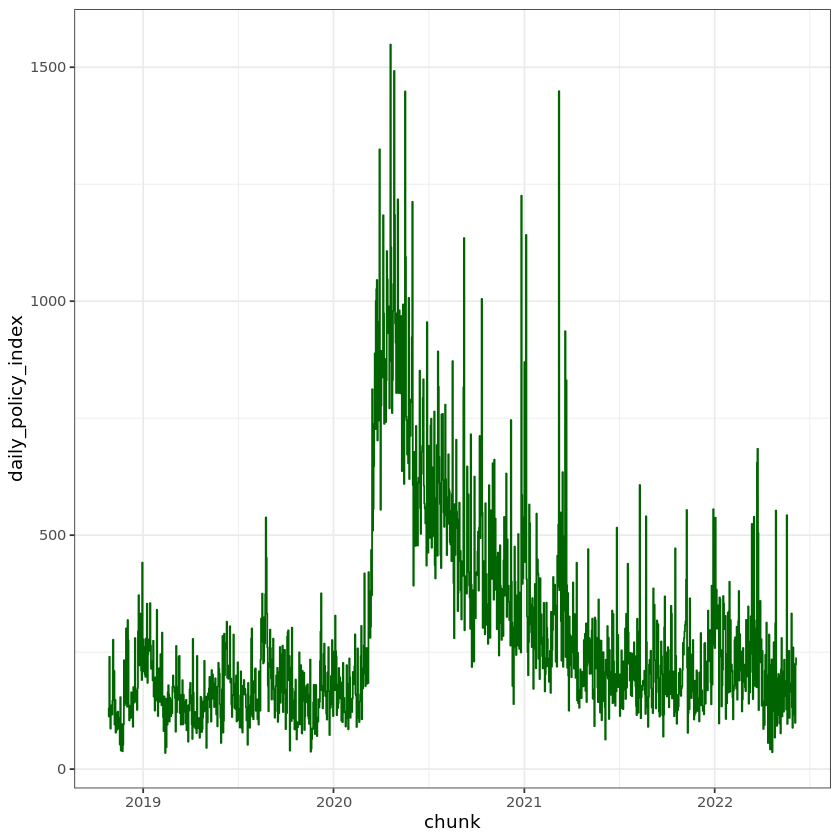

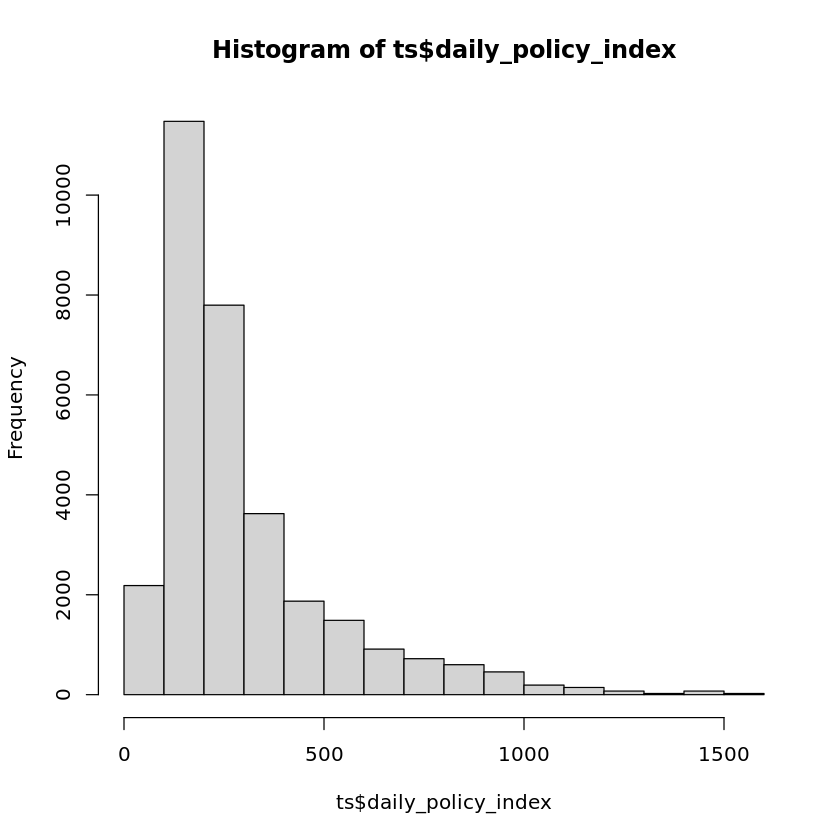


	Pearson's product-moment correlation

data:  ts$daily_policy_index and ts$standardised_texts
t = 1.6882, df = 31656, p-value = 0.09138
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.001527786  0.020501493
sample estimates:
        cor 
0.009488005 



Call:
lm(formula = standardised_texts ~ daily_policy_index, data = ts)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1459 -0.6663 -0.1153  0.5845  3.2821 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)  
(Intercept)        -1.167e-02  8.910e-03  -1.309   0.1904  
daily_policy_index  4.043e-05  2.395e-05   1.688   0.0914 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9594 on 31656 degrees of freedom
Multiple R-squared:  9.002e-05,	Adjusted R-squared:  5.844e-05 
F-statistic:  2.85 on 1 and 31656 DF,  p-value: 0.09138


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31654,NA,NA,NA
2,31655,-1,1.150551,0.2834421


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31651,NA,NA,NA
2,31653,-2,0.5607283,0.5707989


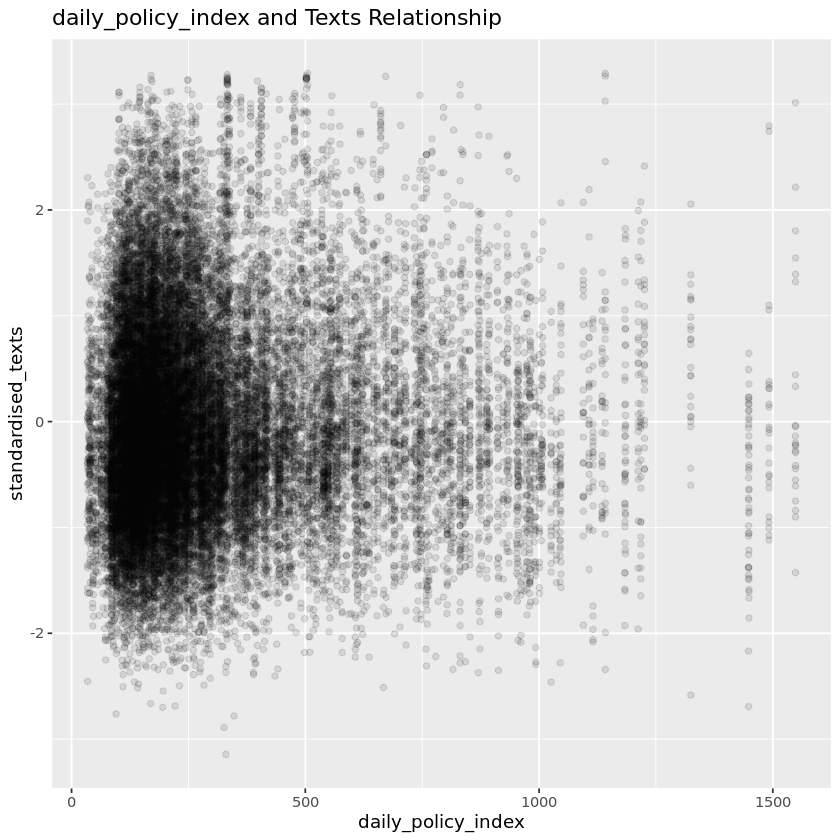

In [19]:
ggplot(ts,aes(chunk,daily_policy_index)) + geom_line(col="darkgreen") + theme_bw()
hist(ts$daily_policy_index)
ggplot(ts,aes(daily_policy_index,standardised_texts)) + geom_point(alpha=0.1) + ggtitle("daily_policy_index and Texts Relationship")

cor.test(ts$daily_policy_index,ts$standardised_texts)
summary(lm(data=ts,standardised_texts ~ daily_policy_index))
grangertest(standardised_texts ~ daily_policy_index, order = 1, data = ts)
grangertest(standardised_texts ~ daily_policy_index, order = 2, data = ts)

In [20]:
ts$temp_avg <- rep(NA, (dim(ts)[1])) %>% as.numeric
for (i in seq(25,(dim(ts)[1]),by=1)) {
  ts[i,'temp_avg'] <- (ts[(i-24):(i-1),'daily_policy_index']  %>% summarise_if(is.numeric, mean))[[1]]
}
summary(ts$temp_avg)
cor.test(ts$temp_avg,sqrt(ts$texts))
summary(lm(data=ts,sqrt(texts) ~ temp_avg))
grangertest(sqrt(texts) ~ temp_avg, order = 1, data = ts)
grangertest(sqrt(texts) ~ temp_avg, order = 2, data = ts)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  34.43  155.97  219.98  296.32  351.80 1548.50      24 


	Pearson's product-moment correlation

data:  ts$temp_avg and sqrt(ts$texts)
t = 18.77, df = 31632, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.09403989 0.11583678
sample estimates:
      cor 
0.1049509 



Call:
lm(formula = sqrt(texts) ~ temp_avg, data = ts)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5559 -1.9892 -0.3107  1.5623 20.8347 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.529e+00  2.614e-02  211.47   <2e-16 ***
temp_avg    1.336e-03  7.116e-05   18.77   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.749 on 31632 degrees of freedom
  (24 observations deleted due to missingness)
Multiple R-squared:  0.01101,	Adjusted R-squared:  0.01098 
F-statistic: 352.3 on 1 and 31632 DF,  p-value: < 2.2e-16


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31630,NA,NA,NA
2,31631,-1,13.08944,0.0002974267


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31627,NA,NA,NA
2,31629,-2,8.155735,0.0002876884


In [21]:
ts$temp_avg <- rep(NA, (dim(ts)[1])) %>% as.numeric
for (i in seq(25,(dim(ts)[1]),by=1)) {
  ts[i,'temp_avg'] <- (ts[(i-24):(i-1),'daily_policy_index']  %>% summarise_if(is.numeric, mean))[[1]]
}
summary(ts$temp_avg)
cor.test(ts$temp_avg,ts$standardised_texts)
summary(lm(data=ts,standardised_texts ~ temp_avg))
grangertest(standardised_texts ~ temp_avg, order = 1, data = ts)
grangertest(standardised_texts ~ temp_avg, order = 2, data = ts)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  34.43  155.97  219.98  296.32  351.80 1548.50      24 


	Pearson's product-moment correlation

data:  ts$temp_avg and ts$standardised_texts
t = 2.0868, df = 31632, p-value = 0.03691
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.0007126922 0.0227492759
sample estimates:
       cor 
0.01173241 



Call:
lm(formula = standardised_texts ~ temp_avg, data = ts)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1482 -0.6664 -0.1144  0.5850  3.2771 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -1.485e-02  9.124e-03  -1.628   0.1036  
temp_avg     5.183e-05  2.483e-05   2.087   0.0369 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9594 on 31632 degrees of freedom
  (24 observations deleted due to missingness)
Multiple R-squared:  0.0001376,	Adjusted R-squared:  0.000106 
F-statistic: 4.355 on 1 and 31632 DF,  p-value: 0.03691


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31630,NA,NA,NA
2,31631,-1,1.784436,0.1816152


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31627,NA,NA,NA
2,31629,-2,0.5638218,0.5690359


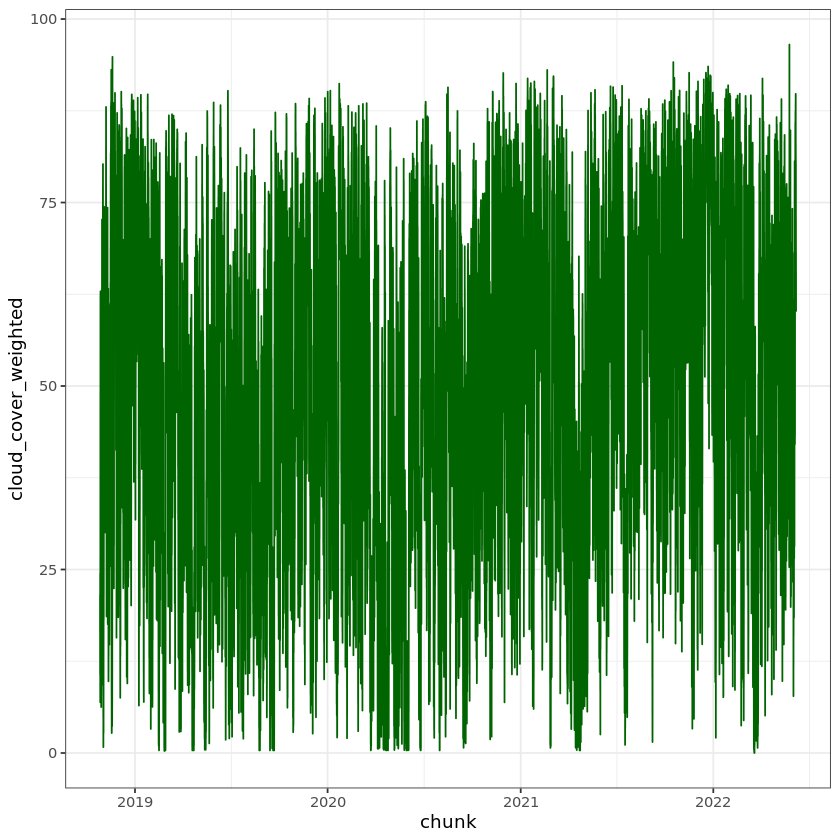

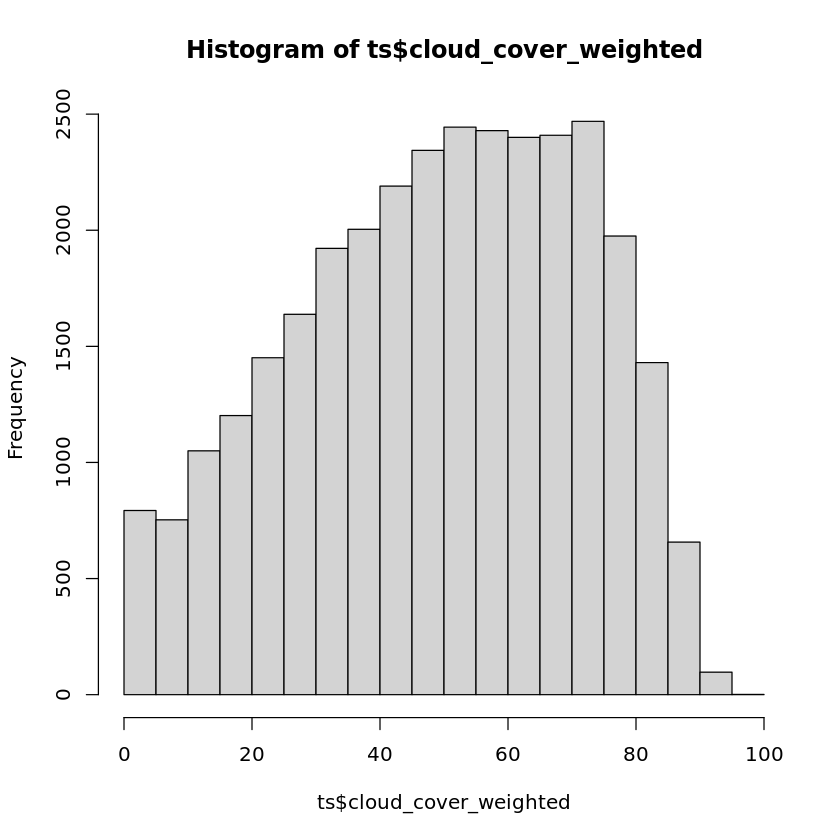

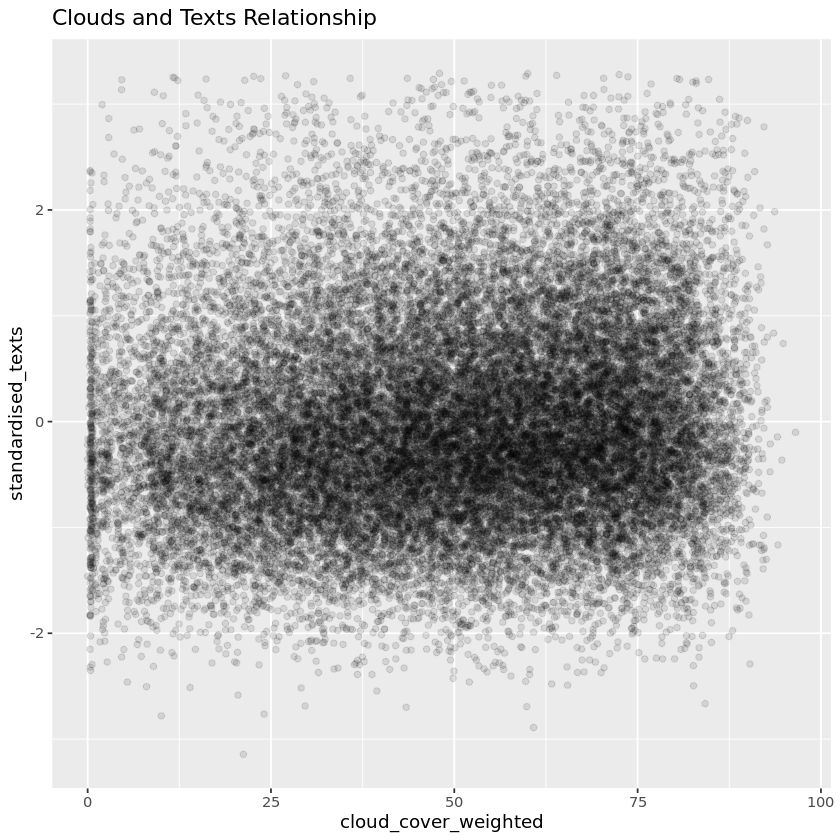

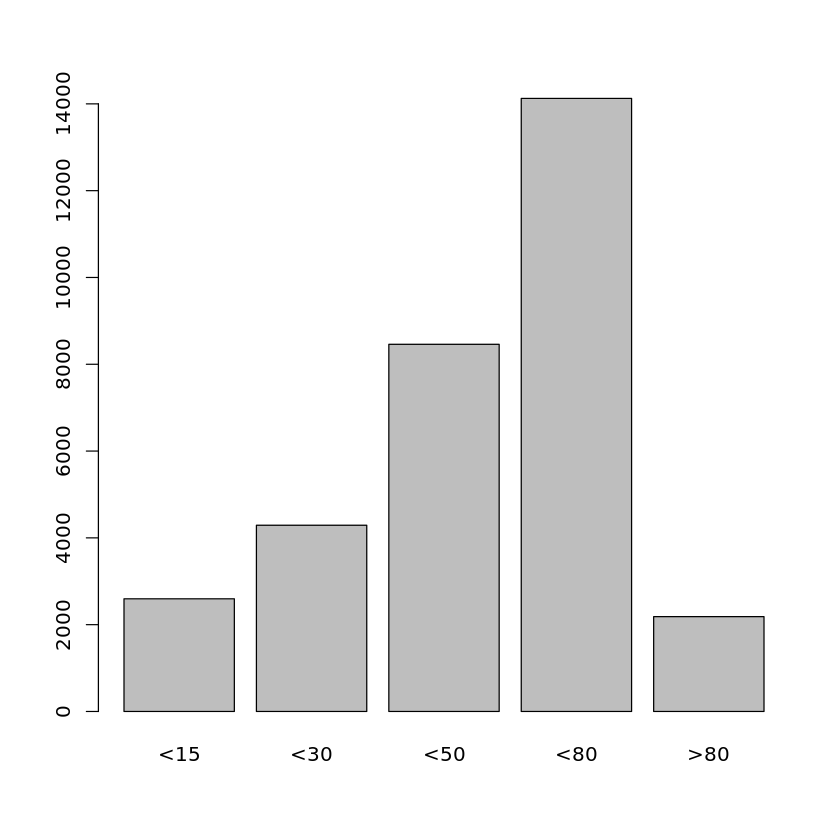


	Pearson's product-moment correlation

data:  ts$cloud_cover_weighted and ts$standardised_texts
t = 16.089, df = 31656, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.07912044 0.10097304
sample estimates:
       cor 
0.09005758 



Call:
lm(formula = standardised_texts ~ avg.cloud, data = ts)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0400 -0.6670 -0.1137  0.5853  3.4012 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.020001   0.006801  -2.941  0.00327 ** 
avg.cloud.L  0.226348   0.018329  12.349  < 2e-16 ***
avg.cloud.Q  0.020648   0.016458   1.255  0.20962    
avg.cloud.C -0.018675   0.013717  -1.361  0.17337    
avg.cloud^4 -0.009915   0.011404  -0.869  0.38461    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9561 on 31653 degrees of freedom
Multiple R-squared:  0.007067,	Adjusted R-squared:  0.006942 
F-statistic: 56.32 on 4 and 31653 DF,  p-value: < 2.2e-16



Call:
lm(formula = standardised_texts ~ cloud_cover_weighted, data = ts)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0351 -0.6667 -0.1132  0.5831  3.4042 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.192115   0.013111  -14.65   <2e-16 ***
cloud_cover_weighted  0.003909   0.000243   16.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9555 on 31656 degrees of freedom
Multiple R-squared:  0.00811,	Adjusted R-squared:  0.008079 
F-statistic: 258.8 on 1 and 31656 DF,  p-value: < 2.2e-16


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31654,NA,NA,NA
2,31655,-1,101.6404,7.233555e-24


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31651,NA,NA,NA
2,31653,-2,33.61293,2.615603e-15


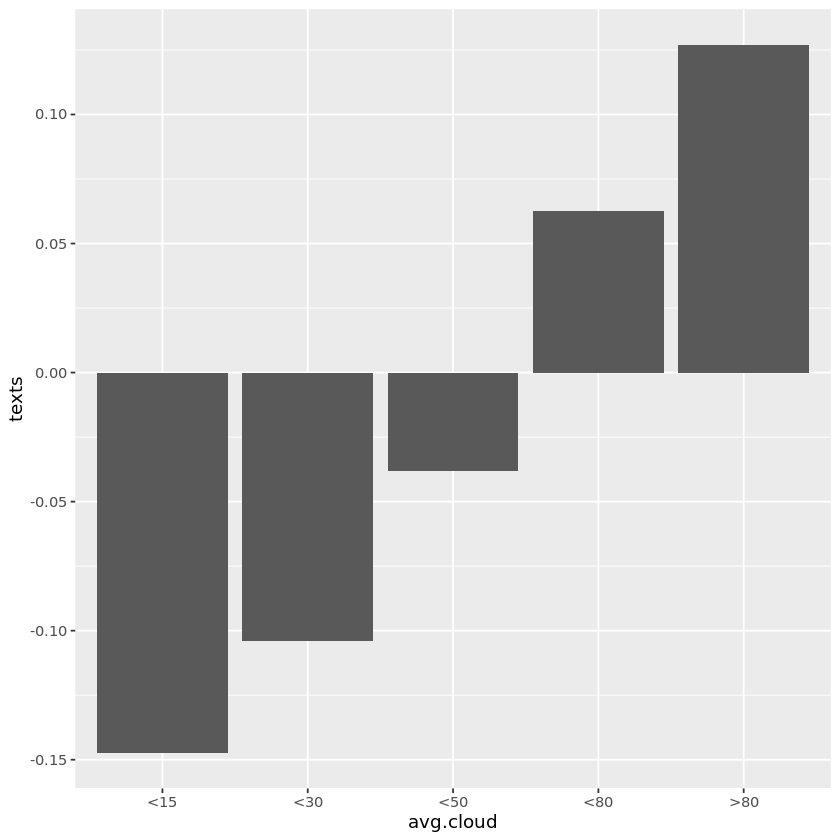

In [22]:
ggplot(ts,aes(chunk,cloud_cover_weighted)) + geom_line(col="darkgreen") + theme_bw()
hist(ts$cloud_cover_weighted)
ggplot(ts,aes(cloud_cover_weighted,standardised_texts)) + geom_point(alpha=0.1) + ggtitle("Clouds and Texts Relationship")
ts$avg.cloud <- ifelse(ts$cloud_cover_weighted <15,"<15",
                       ifelse(ts$cloud_cover_weighted >= 15 & ts$cloud_cover_weighted <30,"<30",
                              ifelse(ts$cloud_cover_weighted >= 30 & ts$cloud_cover_weighted <50,"<50",
                                     ifelse(ts$cloud_cover_weighted >= 50 & ts$cloud_cover_weighted <80,"<80",">80"
                                     ))))
barplot(table(ts$avg.cloud))
ts$avg.cloud <- factor(ts$avg.cloud, levels=c("<15","<30","<50","<80",">80"), ordered=TRUE)
clouds_new<- ts %>% as.data.frame() %>% group_by(avg.cloud) %>% summarise(texts = mean(standardised_texts))
ggplot(clouds_new,aes(avg.cloud,texts)) + geom_col()
cor.test(ts$cloud_cover_weighted,ts$standardised_texts)
summary(lm(data=ts,standardised_texts ~ avg.cloud))
summary(lm(data=ts,standardised_texts ~ cloud_cover_weighted))
grangertest(standardised_texts ~ cloud_cover_weighted, order = 1, data = ts)
grangertest(standardised_texts ~ cloud_cover_weighted, order = 2, data = ts)

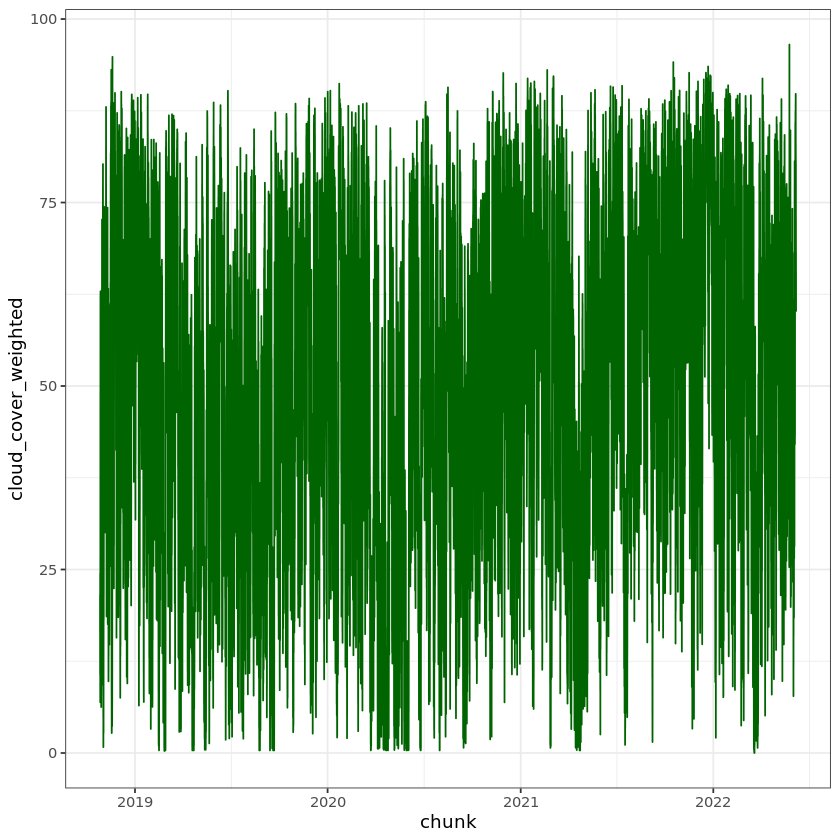

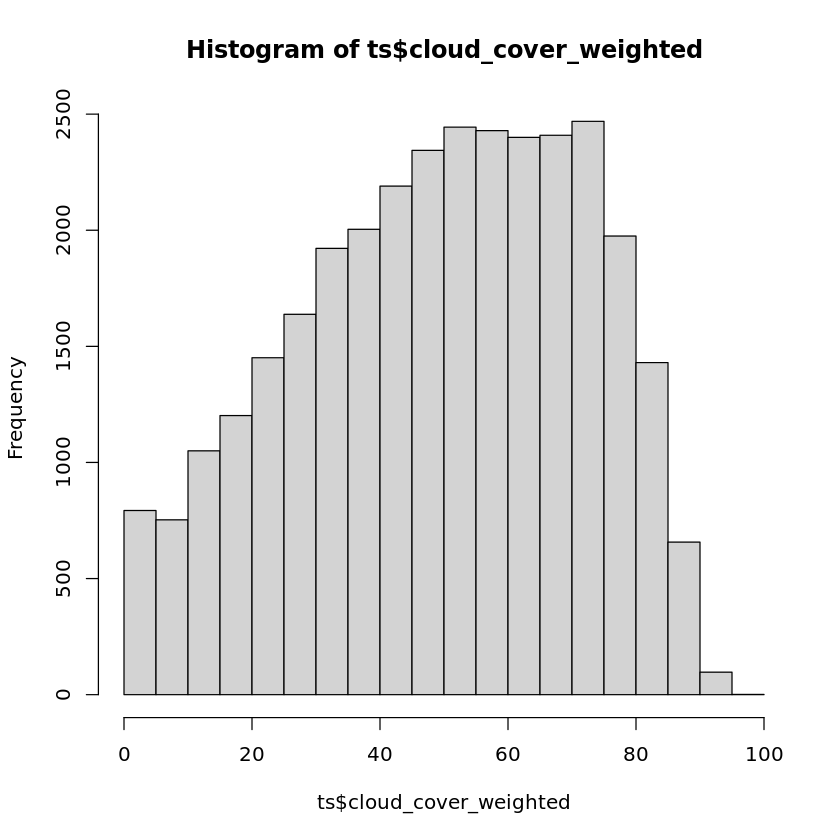

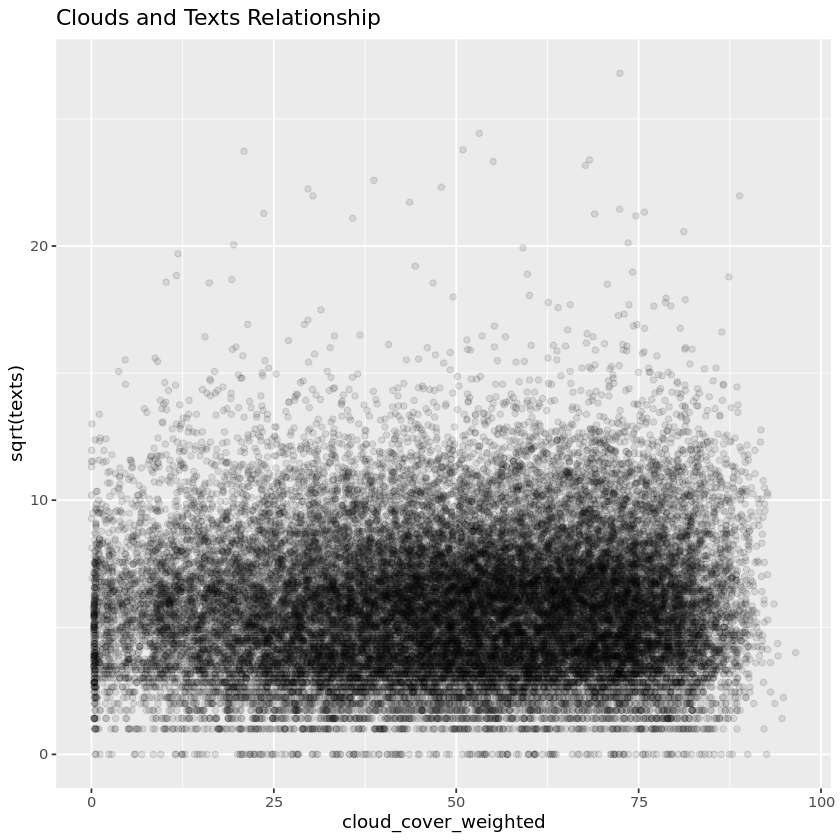

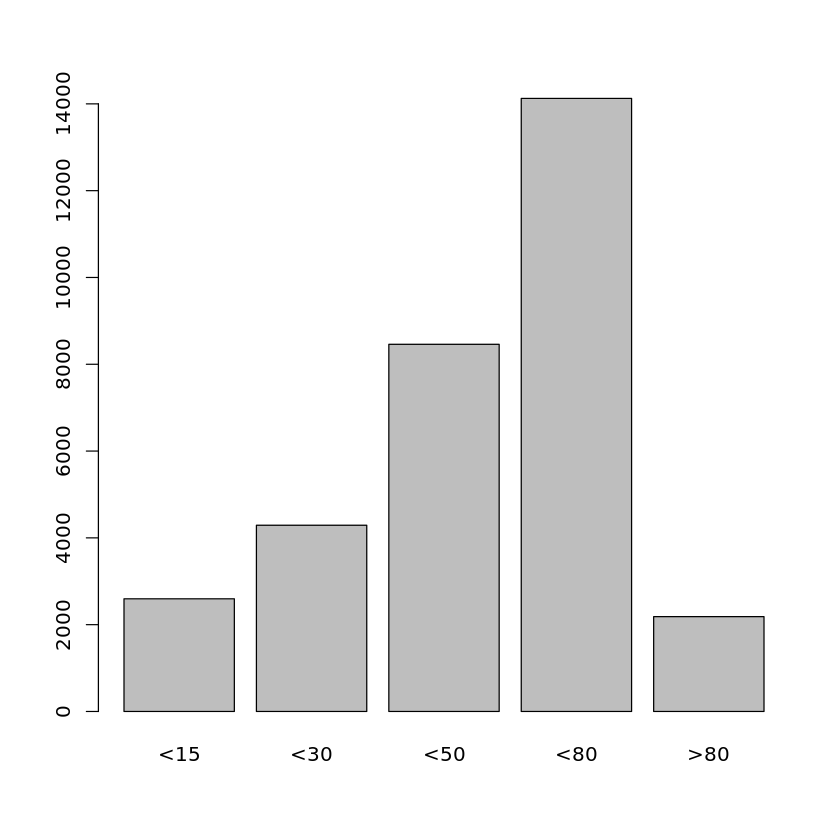


	Pearson's product-moment correlation

data:  ts$cloud_cover_weighted and sqrt(ts$texts)
t = 9.5915, df = 31656, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.04284031 0.06480774
sample estimates:
       cor 
0.05383054 



Call:
lm(formula = sqrt(texts) ~ avg.cloud, data = ts)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2110 -2.0285 -0.2725  1.5933 20.7671 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.90669    0.01964 300.708  < 2e-16 ***
avg.cloud.L  0.38885    0.05294   7.345 2.11e-13 ***
avg.cloud.Q  0.14056    0.04753   2.957  0.00311 ** 
avg.cloud.C -0.04839    0.03962  -1.222  0.22190    
avg.cloud^4 -0.01207    0.03294  -0.366  0.71406    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.761 on 31653 degrees of freedom
Multiple R-squared:  0.002791,	Adjusted R-squared:  0.002665 
F-statistic: 22.15 on 4 and 31653 DF,  p-value: < 2.2e-16



Call:
lm(formula = sqrt(texts) ~ cloud_cover_weighted, data = ts)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2135 -2.0271 -0.2673  1.6062 20.7175 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          5.5901578  0.0378850 147.556   <2e-16 ***
cloud_cover_weighted 0.0067347  0.0007022   9.592   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.761 on 31656 degrees of freedom
Multiple R-squared:  0.002898,	Adjusted R-squared:  0.002866 
F-statistic:    92 on 1 and 31656 DF,  p-value: < 2.2e-16


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31654,NA,NA,NA
2,31655,-1,7.292447,0.006928193


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31651,NA,NA,NA
2,31653,-2,51.93898,3.020801e-23


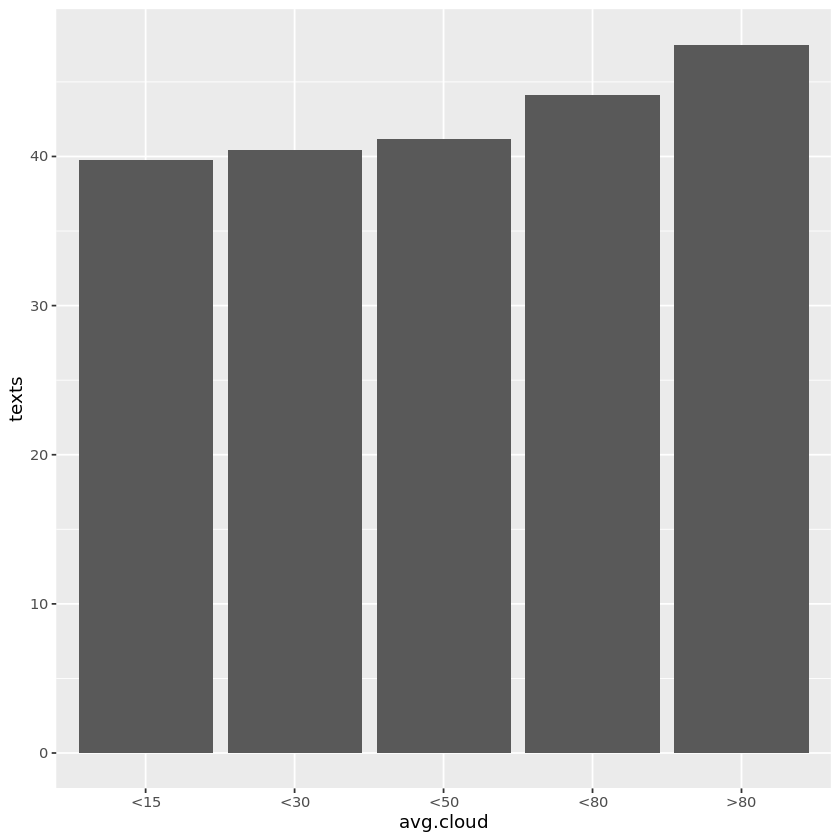

In [23]:
ggplot(ts,aes(chunk,cloud_cover_weighted)) + geom_line(col="darkgreen") + theme_bw()
hist(ts$cloud_cover_weighted)
ggplot(ts,aes(cloud_cover_weighted,sqrt(texts))) + geom_point(alpha=0.1) + ggtitle("Clouds and Texts Relationship")
ts$avg.cloud <- ifelse(ts$cloud_cover_weighted <15,"<15",
                       ifelse(ts$cloud_cover_weighted >= 15 & ts$cloud_cover_weighted <30,"<30",
                              ifelse(ts$cloud_cover_weighted >= 30 & ts$cloud_cover_weighted <50,"<50",
                                     ifelse(ts$cloud_cover_weighted >= 50 & ts$cloud_cover_weighted <80,"<80",">80"
                                     ))))
barplot(table(ts$avg.cloud))
ts$avg.cloud <- factor(ts$avg.cloud, levels=c("<15","<30","<50","<80",">80"), ordered=TRUE)
clouds_new<- ts %>% as.data.frame() %>% group_by(avg.cloud) %>% summarise(texts = mean(texts))
ggplot(clouds_new,aes(avg.cloud,texts)) + geom_col()
cor.test(ts$cloud_cover_weighted,sqrt(ts$texts))
summary(lm(data=ts,sqrt(texts) ~ avg.cloud))
summary(lm(data=ts,sqrt(texts) ~ cloud_cover_weighted))
grangertest(sqrt(texts) ~ cloud_cover_weighted, order = 1, data = ts)
grangertest(sqrt(texts) ~ cloud_cover_weighted, order = 2, data = ts)

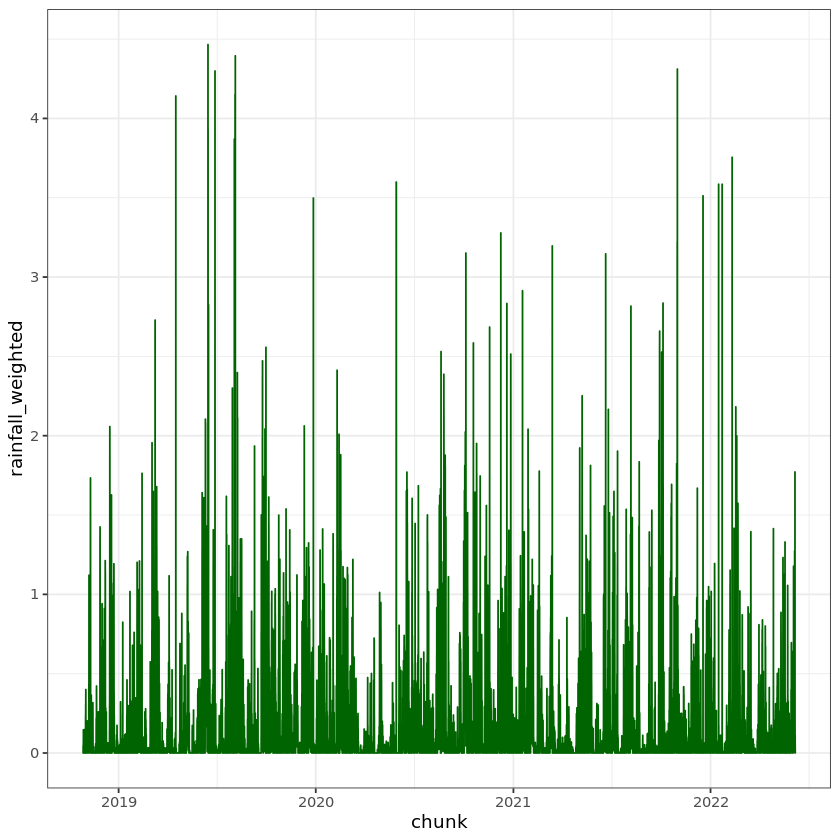

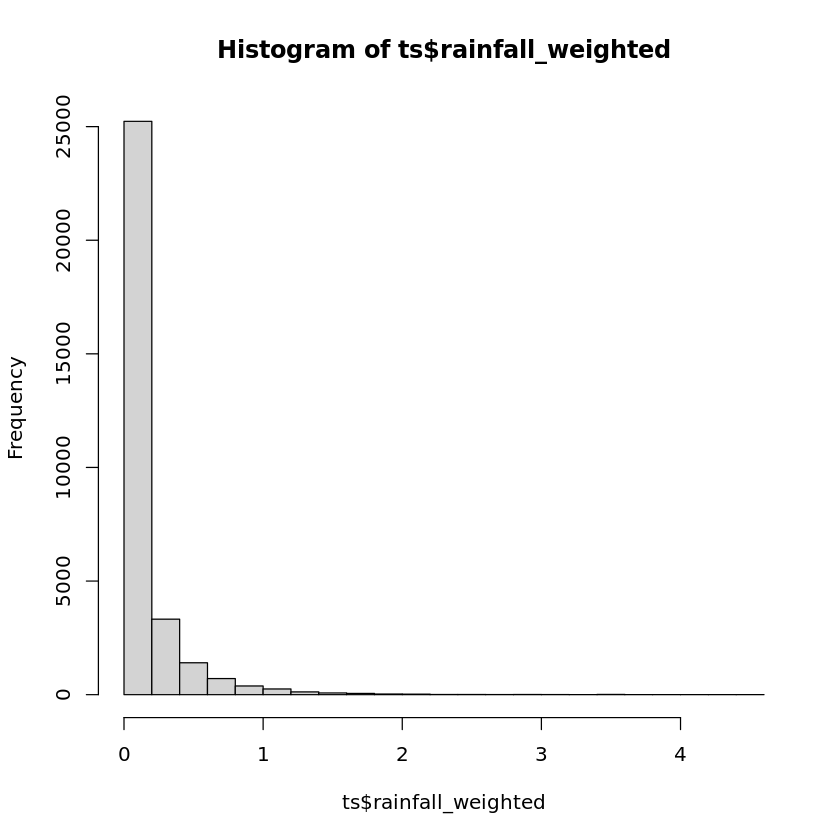

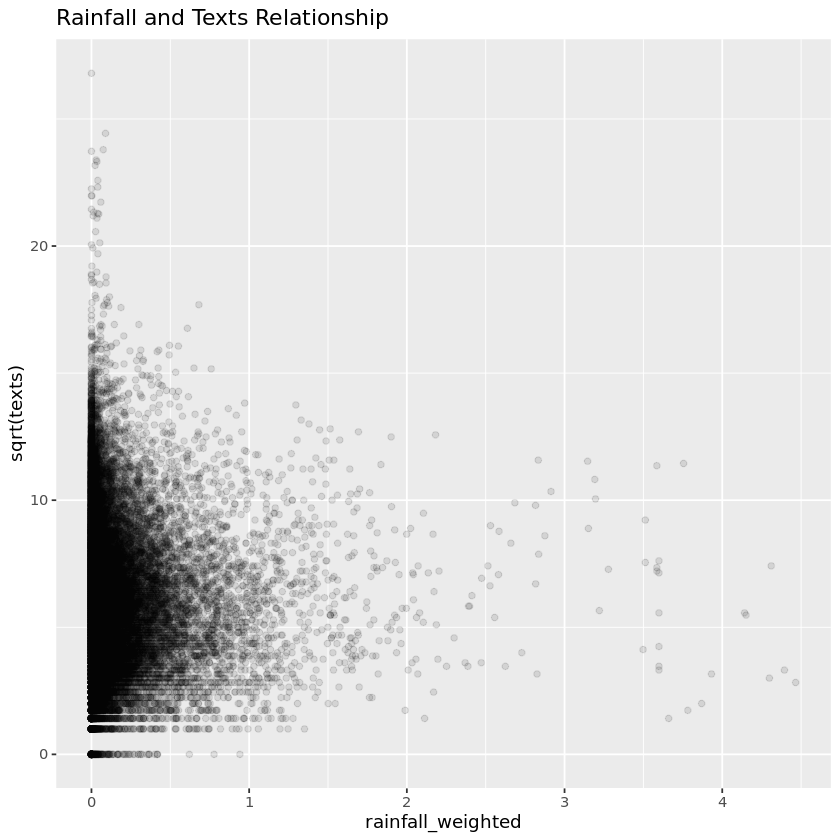


	Pearson's product-moment correlation

data:  log(ts$rainfall_weighted + 0.1) and sqrt(ts$texts)
t = 1.5396, df = 31656, p-value = 0.1237
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.002363135  0.019666477
sample estimates:
       cor 
0.00865272 



Call:
lm(formula = sqrt(texts) ~ log(ts$rainfall_weighted + 0.1), data = ts)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9846 -2.0287 -0.2601  1.5980 20.8938 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.98314    0.04286  139.60   <2e-16 ***
log(ts$rainfall_weighted + 0.1)  0.03538    0.02298    1.54    0.124    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.765 on 31656 degrees of freedom
Multiple R-squared:  7.487e-05,	Adjusted R-squared:  4.328e-05 
F-statistic:  2.37 on 1 and 31656 DF,  p-value: 0.1237


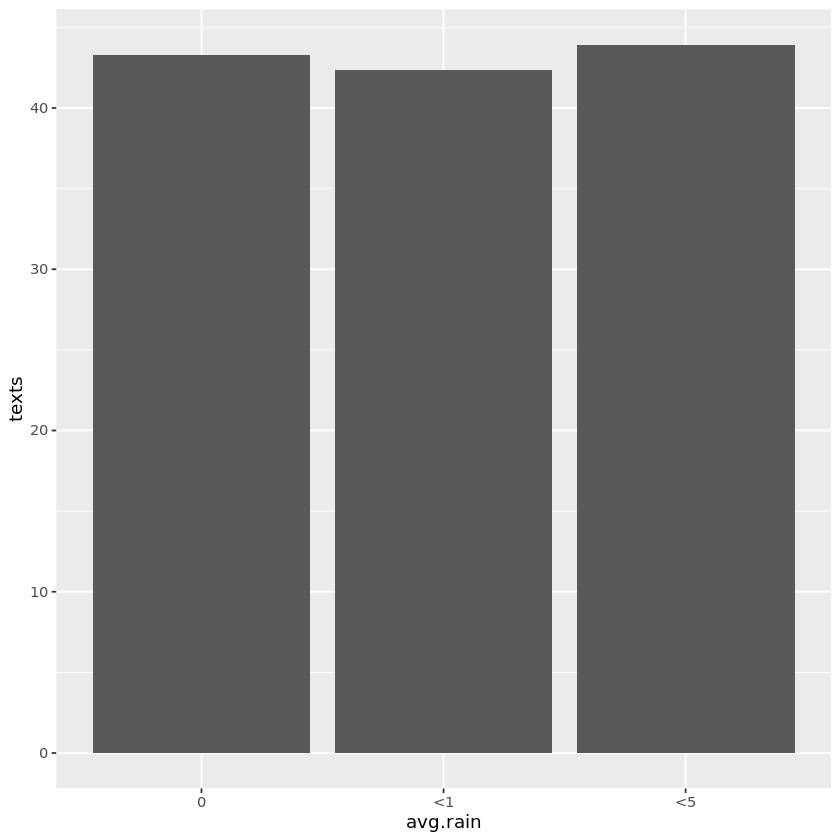

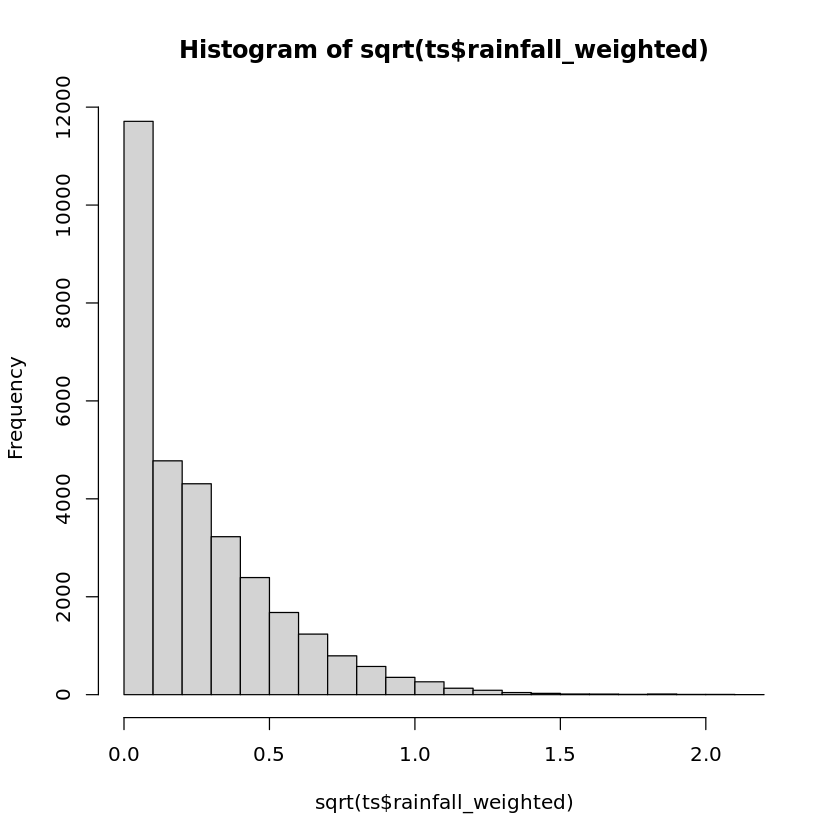

,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31654,NA,NA,NA
2,31655,-1,22.00912,2.724903e-06


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31651,NA,NA,NA
2,31653,-2,15.28713,2.312542e-07


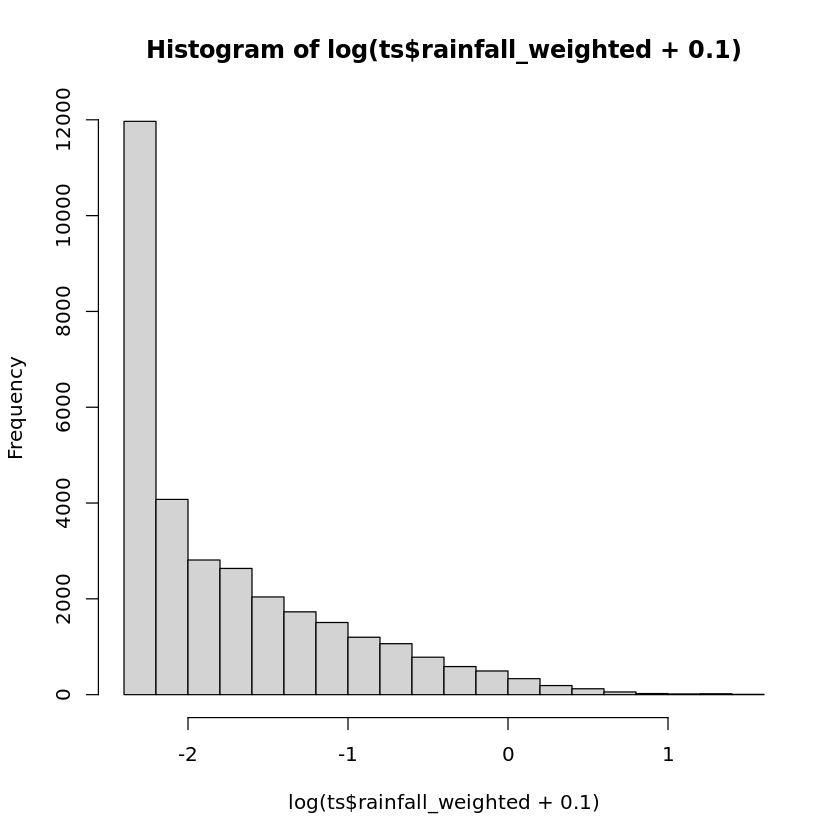

In [24]:
ggplot(ts,aes(chunk,rainfall_weighted)) + geom_line(col="darkgreen") + theme_bw()
hist(ts$rainfall_weighted)
ggplot(ts,aes(rainfall_weighted,sqrt(texts))) + geom_point(alpha=0.1) + ggtitle("Rainfall and Texts Relationship")
ts$avg.rain <- ifelse(ts$rainfall_weighted<0.001,"0",
                      ifelse(ts$rainfall_weighted<1,"<1",
                             ifelse(ts$rainfall_weighted<5,"<5",
                                    ifelse(ts$rainfall_weighted<10,"<10",">10"
                                    ))))
ts$avg.rain <- factor(ts$avg.rain, levels=c("0","<1","<5","<10",">10"), ordered=TRUE)
rains<- ts %>% as.data.frame %>% group_by(avg.rain) %>% summarise(texts = mean(texts)) %>% as.data.frame()
ggplot(rains,aes(avg.rain,texts)) + geom_col()
cor.test(log(ts$rainfall_weighted+0.1),sqrt(ts$texts))
summary(lm(data=ts,sqrt(texts) ~ log(ts$rainfall_weighted+0.1)))
hist(sqrt(ts$rainfall_weighted))
hist(log(ts$rainfall_weighted+0.1))
grangertest(sqrt(texts) ~ log(rainfall_weighted+0.1), order = 1, data = ts)
grangertest(sqrt(texts) ~ log(rainfall_weighted+0.1), order = 2, data = ts)

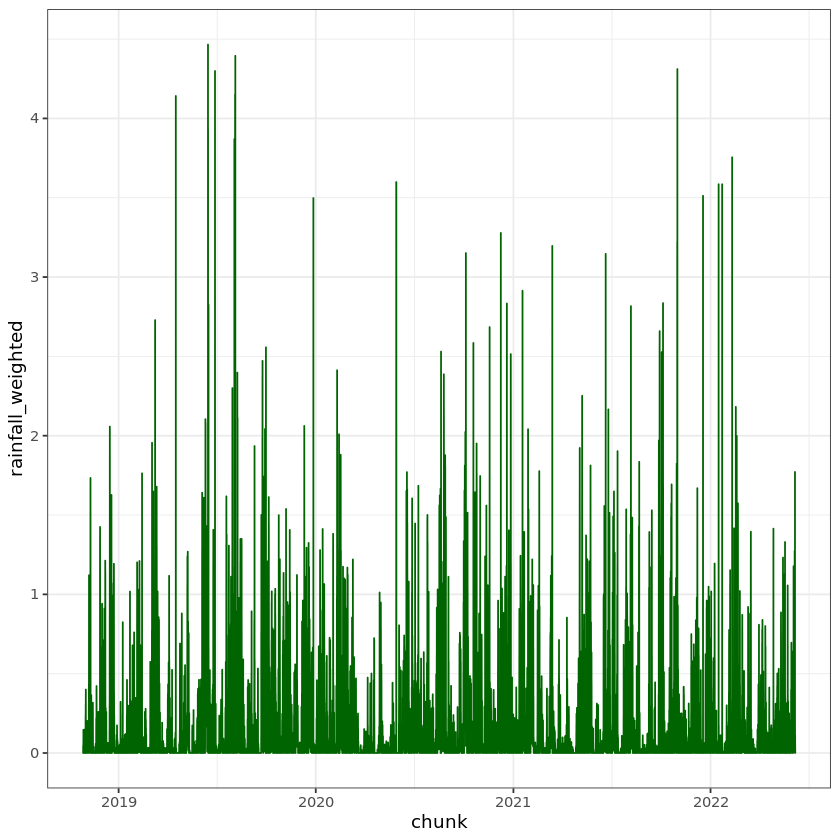

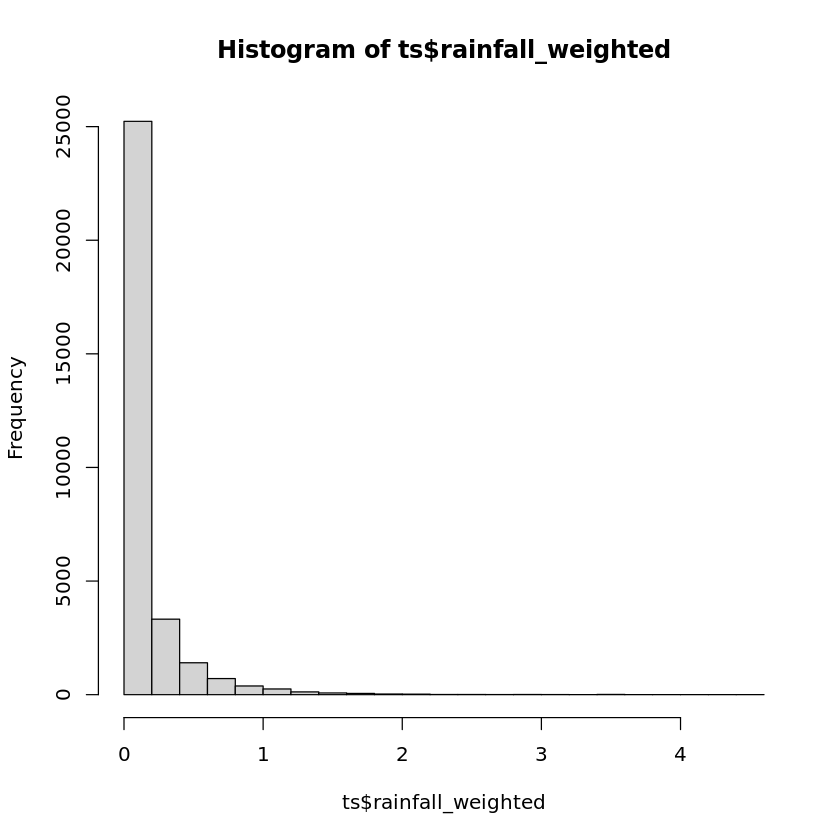

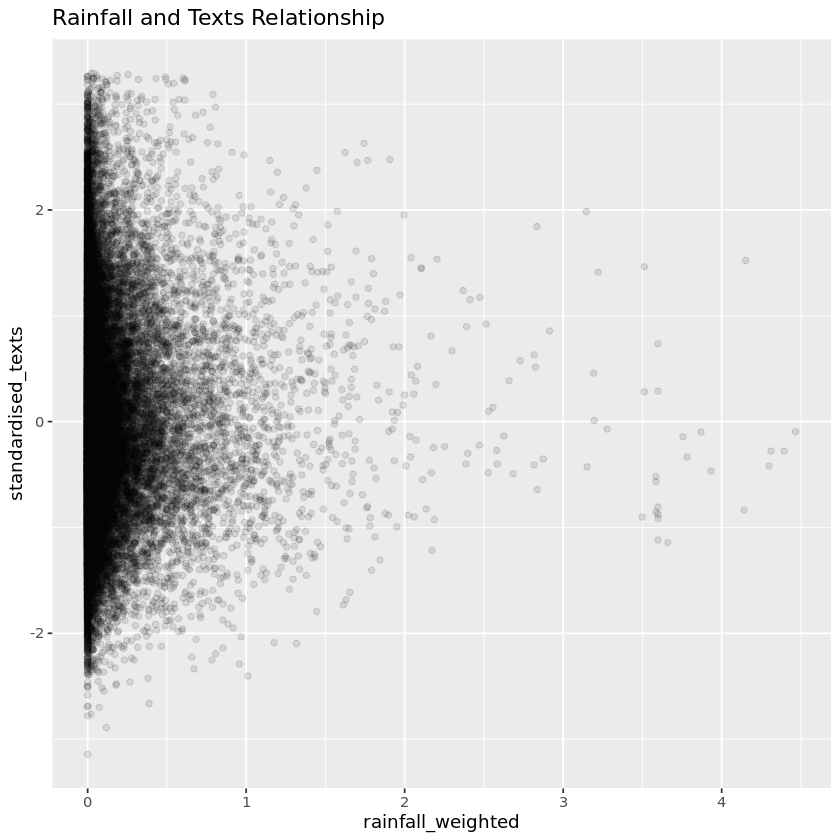


	Pearson's product-moment correlation

data:  log(ts$rainfall_weighted + 0.1) and ts$standardised_texts
t = 9.137, df = 31656, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.04029383 0.06226714
sample estimates:
       cor 
0.05128669 



Call:
lm(formula = standardised_texts ~ log(ts$rainfall_weighted + 
    0.1), data = ts)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1035 -0.6684 -0.1144  0.5802  3.3148 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     0.126773   0.014852   8.536   <2e-16 ***
log(ts$rainfall_weighted + 0.1) 0.072756   0.007963   9.137   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9582 on 31656 degrees of freedom
Multiple R-squared:  0.00263,	Adjusted R-squared:  0.002599 
F-statistic: 83.49 on 1 and 31656 DF,  p-value: < 2.2e-16


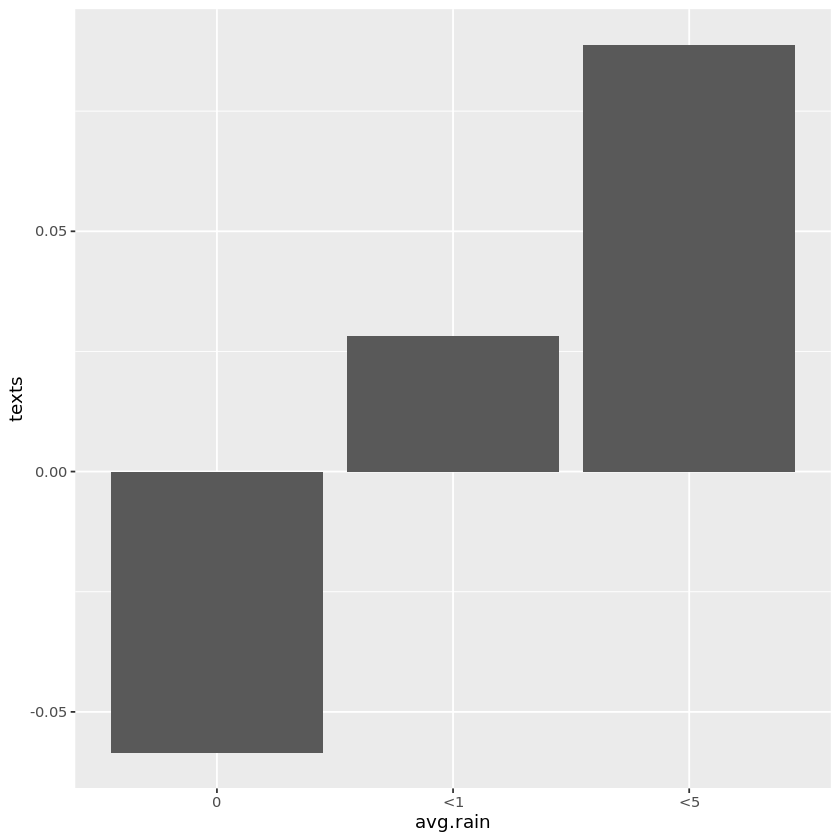

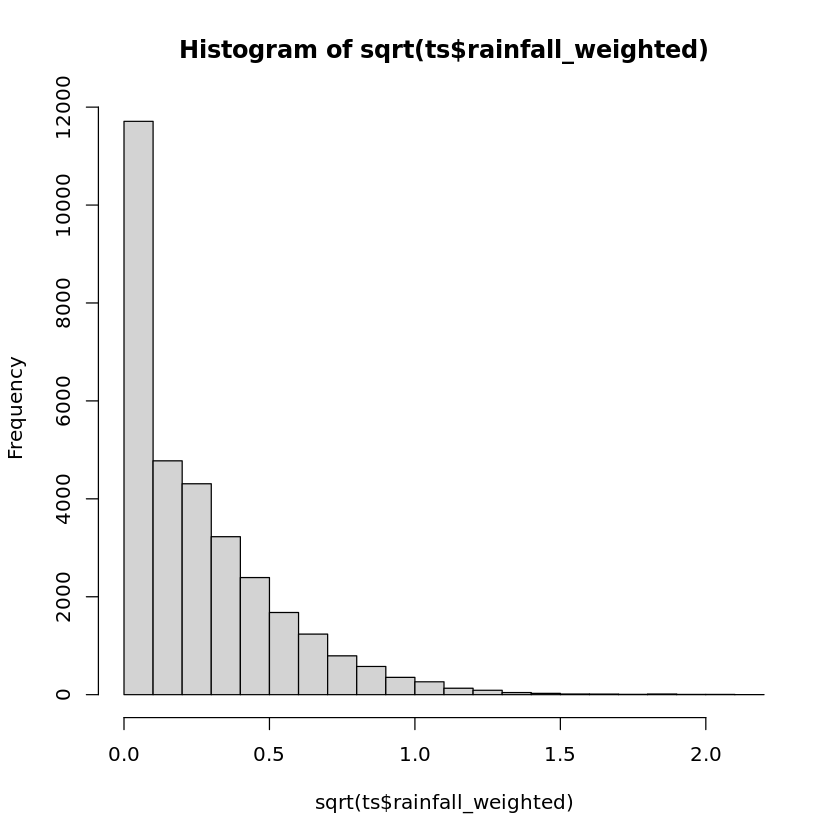

,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31654,NA,NA,NA
2,31655,-1,33.841,6.038009e-09


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,31651,NA,NA,NA
2,31653,-2,14.02017,8.200025e-07


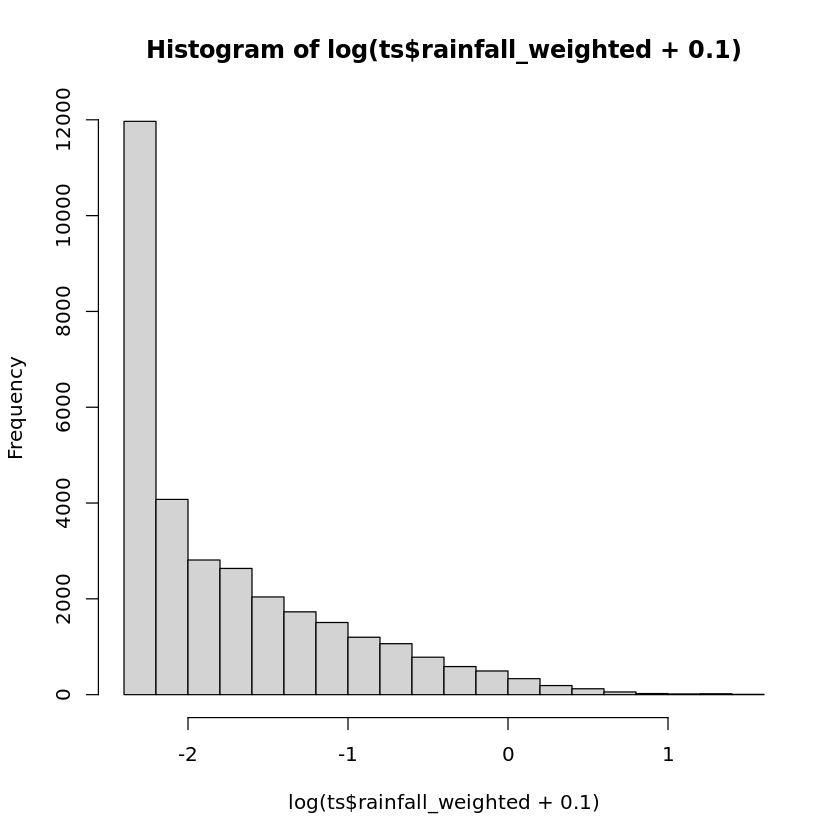

In [25]:
ggplot(ts,aes(chunk,rainfall_weighted)) + geom_line(col="darkgreen") + theme_bw()
hist(ts$rainfall_weighted)
ggplot(ts,aes(rainfall_weighted,standardised_texts)) + geom_point(alpha=0.1) + ggtitle("Rainfall and Texts Relationship")
ts$avg.rain <- ifelse(ts$rainfall_weighted<0.001,"0",
                      ifelse(ts$rainfall_weighted<1,"<1",
                             ifelse(ts$rainfall_weighted<5,"<5",
                                    ifelse(ts$rainfall_weighted<10,"<10",">10"
                                    ))))
ts$avg.rain <- factor(ts$avg.rain, levels=c("0","<1","<5","<10",">10"), ordered=TRUE)
rains<- ts %>% as.data.frame %>% group_by(avg.rain) %>% summarise(texts = mean(standardised_texts)) %>% as.data.frame()
ggplot(rains,aes(avg.rain,texts)) + geom_col()
cor.test(log(ts$rainfall_weighted+0.1),ts$standardised_texts)
summary(lm(data=ts,standardised_texts ~ log(ts$rainfall_weighted+0.1)))
hist(sqrt(ts$rainfall_weighted))
hist(log(ts$rainfall_weighted+0.1))
grangertest(standardised_texts ~ log(rainfall_weighted+0.1), order = 1, data = ts)
grangertest(standardised_texts ~ log(rainfall_weighted+0.1), order = 2, data = ts)